# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [44]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

ames = pd.read_csv('ames.csv',index_col=None,encoding='latin-1')

subset = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'SalePrice']

data = ames.loc[:, subset]

The columns in the Ames housing data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is the sale price of a house `SalePrice`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### Inspect the columns of the dataset and comment on type of variables present

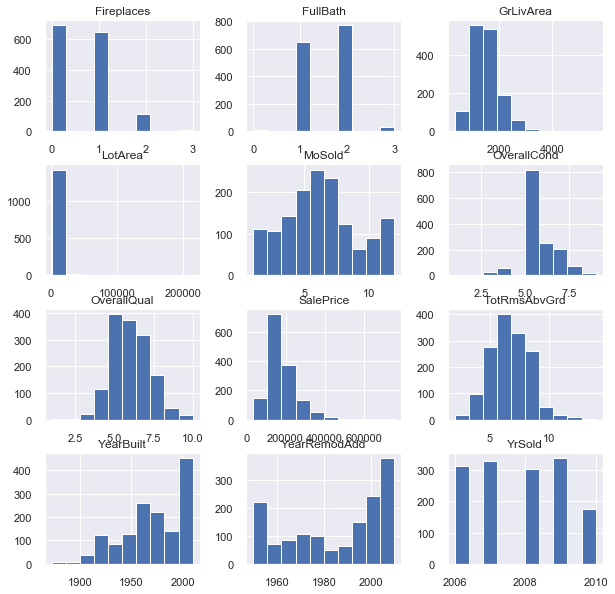

In [2]:
# Your code here
data.hist(figsize=(10,10))
plt.show()

In [3]:
# Record your observations here 
# You observations here 

# LotArea, SalePrice, GrLivArea are all continuous and appear to be log normally distributed.
# Most values are bunched towards the lower end while there are a few very large values
# From the TotRmsAbvGrd feature it looks like most houses have around 6 rooms above ground
# We can see that there is an increase in the number of houses built as time goes on. Most houses sold were built in the 2000s

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

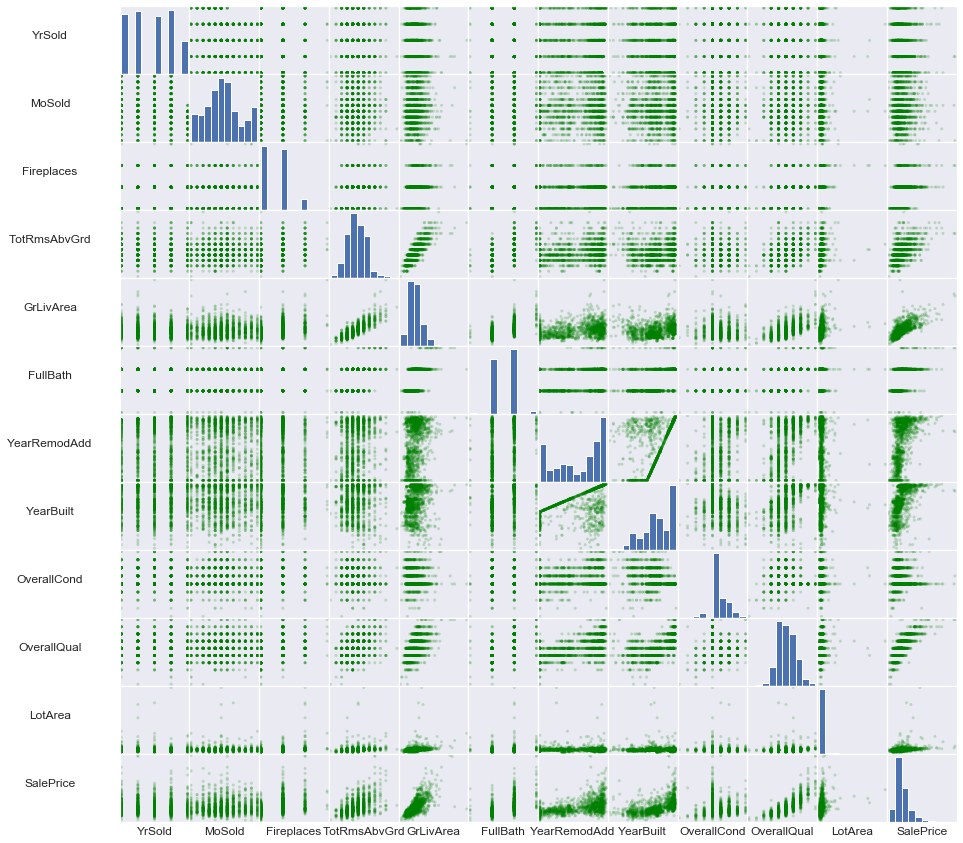

In [4]:
# Your code here 
sm = pd.plotting.scatter_matrix(data, color='green', alpha=0.2, figsize=[15, 15]);

# Rotates the text
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

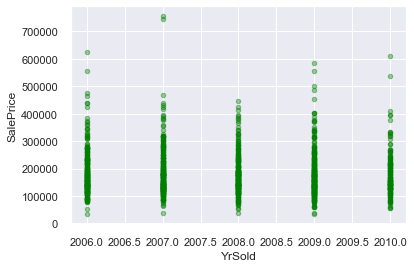

In [5]:
data.plot(kind='scatter', x='YrSold', y='SalePrice', color='green', alpha=0.4)

AxesSubplot(0.125,0.71587;0.227941x0.16413) YrSold
AxesSubplot(0.398529,0.71587;0.227941x0.16413) MoSold
AxesSubplot(0.672059,0.71587;0.227941x0.16413) Fireplaces
AxesSubplot(0.125,0.518913;0.227941x0.16413) TotRmsAbvGrd
AxesSubplot(0.398529,0.518913;0.227941x0.16413) GrLivArea
AxesSubplot(0.672059,0.518913;0.227941x0.16413) FullBath
AxesSubplot(0.125,0.321957;0.227941x0.16413) YearRemodAdd
AxesSubplot(0.398529,0.321957;0.227941x0.16413) YearBuilt
AxesSubplot(0.672059,0.321957;0.227941x0.16413) OverallCond
AxesSubplot(0.125,0.125;0.227941x0.16413) OverallQual
AxesSubplot(0.398529,0.125;0.227941x0.16413) LotArea
AxesSubplot(0.672059,0.125;0.227941x0.16413) yr_diff


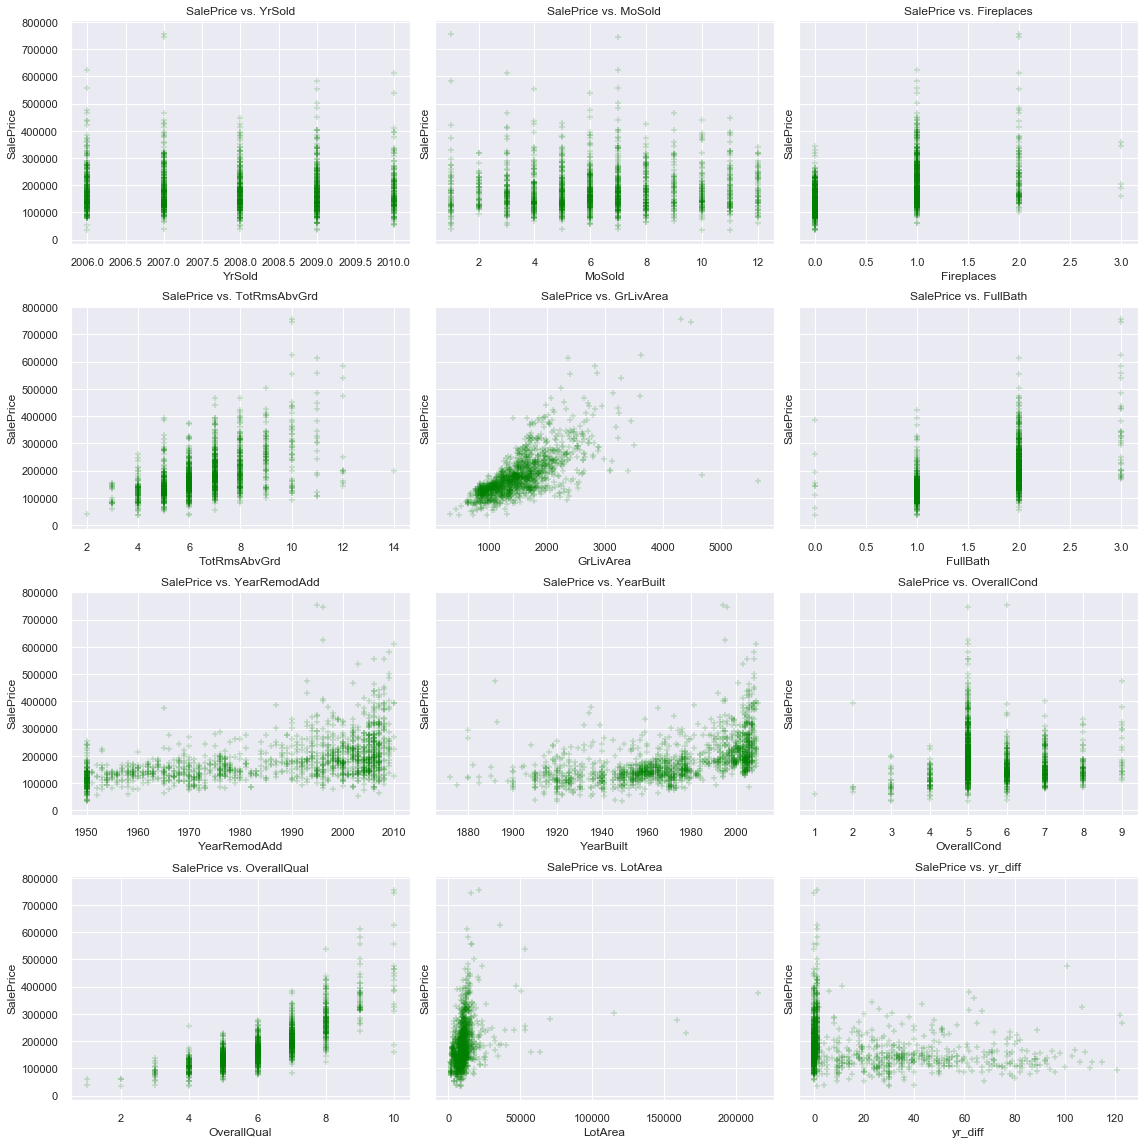

In [6]:
# You observations here 
fig, axes = plt.subplots(nrows=data.shape[1] // 3, ncols=3, sharey=True, figsize=(16, 16))
df = data.copy()
df['yr_diff'] = df['YearRemodAdd'] - df['YearBuilt']
categorial = list(col for col in df.columns if col != 'SalePrice')
for xcol, ax in zip(categorial, axes.flatten()):
    print(ax, xcol)
    ax.scatter(x=df[xcol].dropna(), y=df['SalePrice'], color='green', marker='+', alpha=0.2)
    ax.set_title(f'SalePrice vs. {xcol}')
    ax.set_xlabel(xcol)
    ax.set_ylabel('SalePrice')
    
fig.tight_layout()

### Check the linearity assumption for all chosen features with target variable using scatter plots

AxesSubplot(0.125,0.71587;0.227941x0.16413) YrSold
AxesSubplot(0.398529,0.71587;0.227941x0.16413) MoSold
AxesSubplot(0.672059,0.71587;0.227941x0.16413) Fireplaces
AxesSubplot(0.125,0.518913;0.227941x0.16413) TotRmsAbvGrd
AxesSubplot(0.398529,0.518913;0.227941x0.16413) GrLivArea
AxesSubplot(0.672059,0.518913;0.227941x0.16413) FullBath
AxesSubplot(0.125,0.321957;0.227941x0.16413) YearRemodAdd
AxesSubplot(0.398529,0.321957;0.227941x0.16413) YearBuilt
AxesSubplot(0.672059,0.321957;0.227941x0.16413) OverallCond
AxesSubplot(0.125,0.125;0.227941x0.16413) OverallQual
AxesSubplot(0.398529,0.125;0.227941x0.16413) LotArea
AxesSubplot(0.672059,0.125;0.227941x0.16413) yr_diff


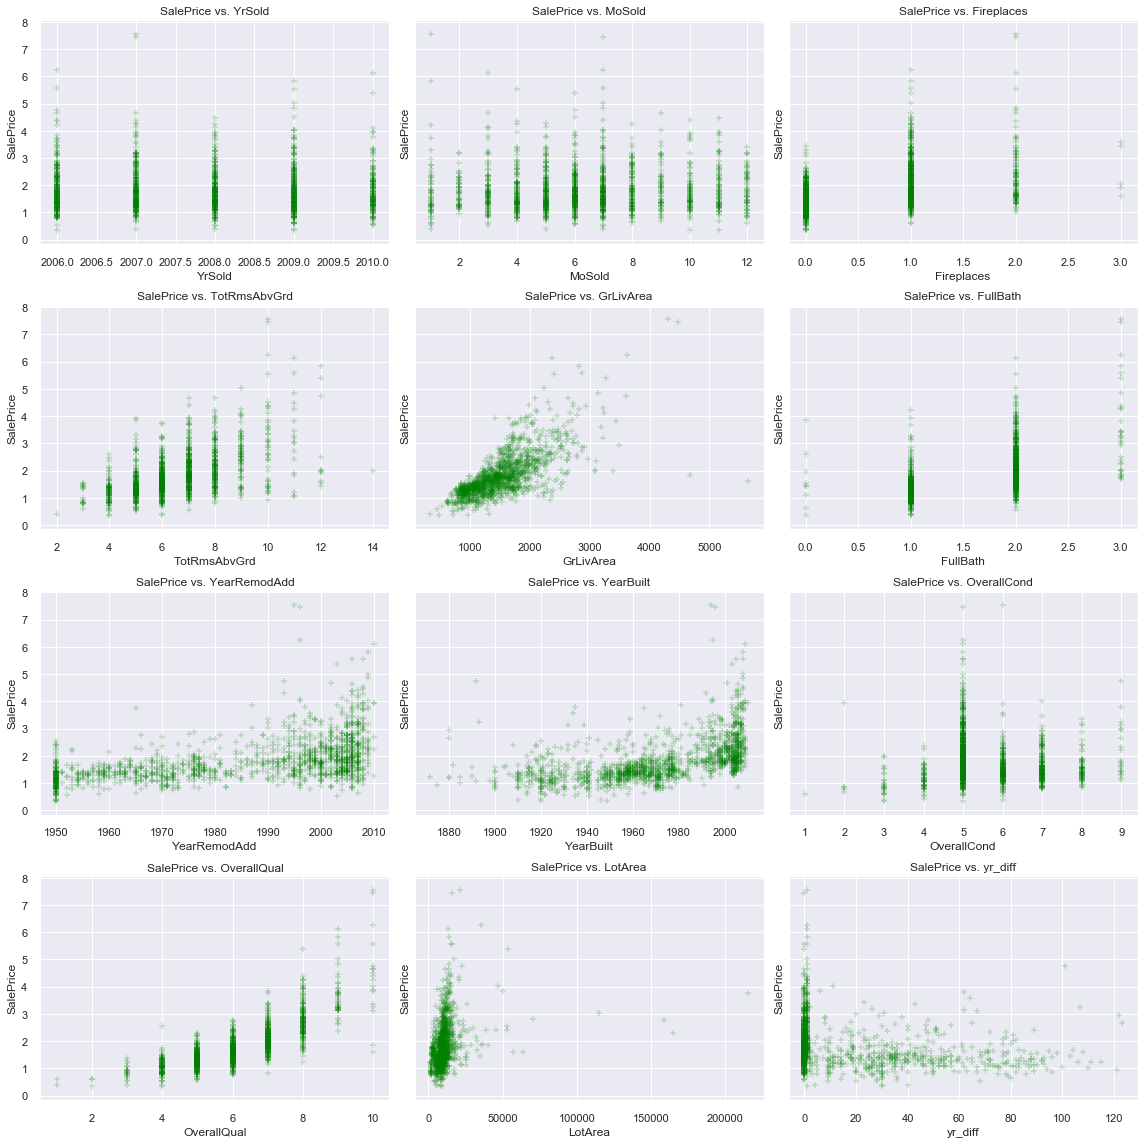

In [7]:
# Your code here 
fig2, axes = plt.subplots(nrows=data.shape[1] // 3, ncols=3, sharey=True, figsize=(16, 16))

for xcol, ax in zip(categorial, axes.flatten()):
    print(ax, xcol)
    ax.scatter(x=df[xcol].dropna(), y=df['SalePrice']/100000, color='green', marker='+', alpha=0.2)
    ax.set_title(f'SalePrice vs. {xcol}')
    ax.set_xlabel(xcol)
    ax.set_ylabel('SalePrice')
    
fig2.tight_layout()

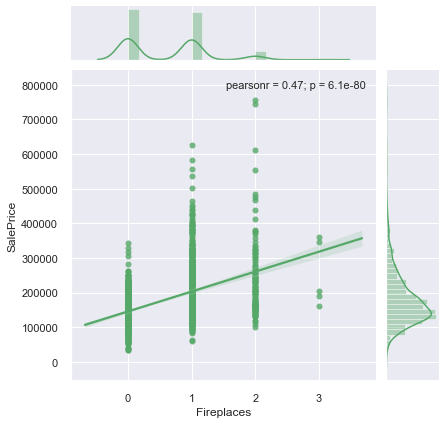

In [8]:
j = sns.jointplot(x='Fireplaces', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

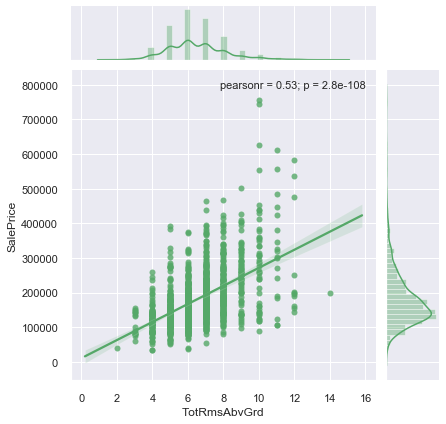

In [9]:
j = sns.jointplot(x='TotRmsAbvGrd', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

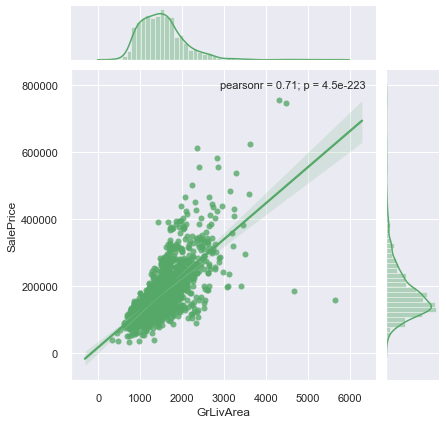

In [10]:
j = sns.jointplot(x='GrLivArea', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

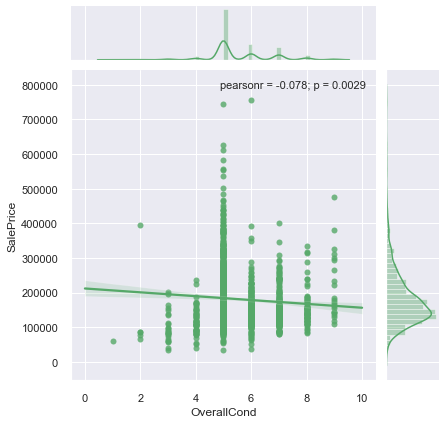

In [11]:
j = sns.jointplot(x='OverallCond', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

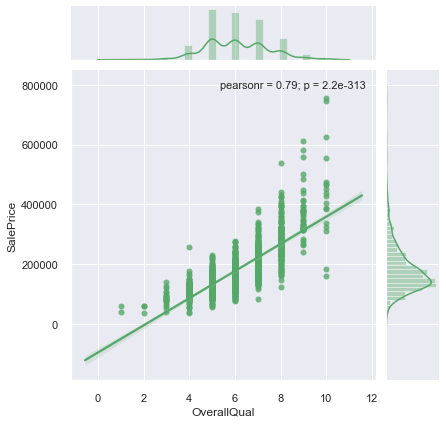

In [12]:
j = sns.jointplot(x='OverallQual', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

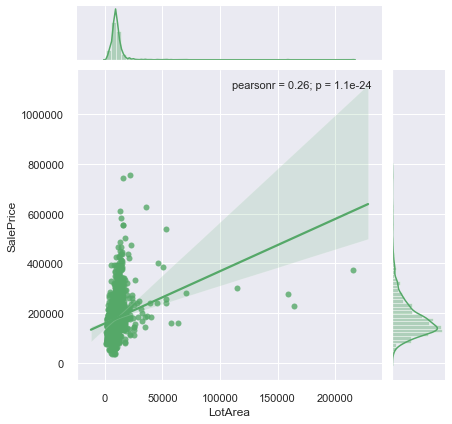

In [13]:
j = sns.jointplot(x='LotArea', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

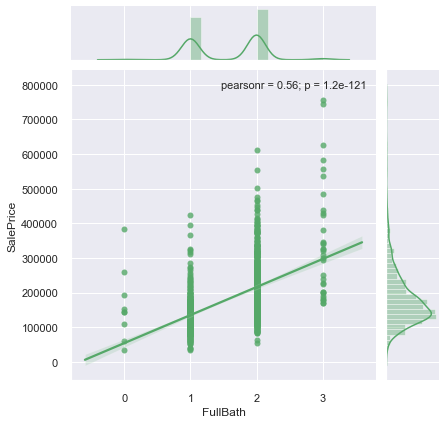

In [14]:
j = sns.jointplot(x='FullBath', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

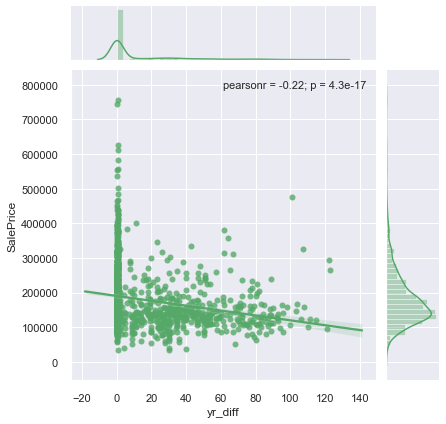

In [15]:
j = sns.jointplot(x='yr_diff', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

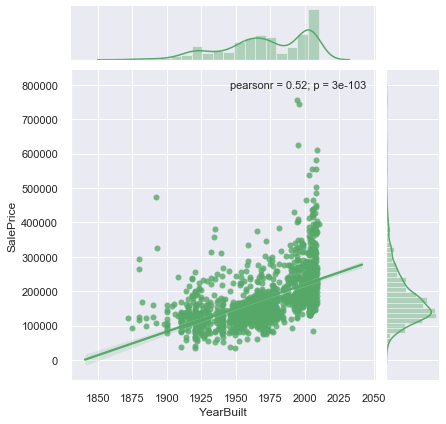

In [16]:
j = sns.jointplot(x='YearBuilt', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

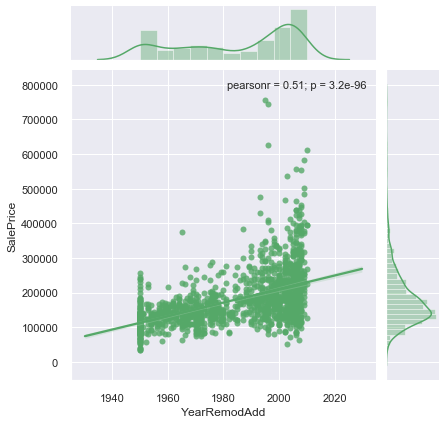

In [17]:
j = sns.jointplot(x='YearRemodAdd', y='SalePrice', data=df, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

In [18]:
data.corr()

YrSold    MoSold  Fireplaces  TotRmsAbvGrd  GrLivArea  \
YrSold        1.000000 -0.145721   -0.024096     -0.034516  -0.036526   
MoSold       -0.145721  1.000000    0.046357      0.036907   0.050240   
Fireplaces   -0.024096  0.046357    1.000000      0.326114   0.461679   
TotRmsAbvGrd -0.034516  0.036907    0.326114      1.000000   0.825489   
GrLivArea    -0.036526  0.050240    0.461679      0.825489   1.000000   
FullBath     -0.019669  0.055872    0.243671      0.554784   0.630012   
YearRemodAdd  0.035743  0.021490    0.112581      0.191740   0.287389   
YearBuilt    -0.013618  0.012398    0.147716      0.095589   0.199010   
OverallCond   0.043950 -0.003511   -0.023820     -0.057583  -0.079686   
OverallQual  -0.027347  0.070815    0.396765      0.427452   0.593007   
LotArea      -0.014261  0.001205    0.271364      0.190015   0.263116   
SalePrice    -0.028923  0.046432    0.466929      0.533723   0.708624   

              FullBath  YearRemodAdd  YearBuilt  OverallCond  OverallQual  \
YrSold       -0.019669      0.035743  -0.013618     0.043950    -0.027347   
MoSold        0.055872      0.021490   0.012398    -0.003511     0.070815   
Fireplaces    0.243671      0.112581   0.147716    -0.023820     0.396765   
TotRmsAbvGrd  0.554784      0.191740   0.095589    -0.057583     0.427452   
GrLivArea     0.630012      0.287389   0.199010    -0.079686     0.593007   
FullBath      1.000000      0.439046   0.468271    -0.194149     0.550600   
YearRemodAdd  0.439046      1.000000   0.592855     0.073741     0.550684   
YearBuilt     0.468271      0.592855   1.000000    -0.375983     0.572323   
OverallCond  -0.194149      0.073741  -0.375983     1.000000    -0.091932   
OverallQual   0.550600      0.550684   0.572323    -0.091932     1.000000   
LotArea       0.126031      0.013788   0.014228    -0.005636     0.105806   
SalePrice     0.560664      0.507101   0.522897    -0.077856     0.790982   

               LotArea  SalePrice  
YrSold       -0.014261  -0.028923  
MoSold        0.001205   0.046432  
Fireplaces    0.271364   0.466929  
TotRmsAbvGrd  0.190015   0.533723  
GrLivArea     0.263116   0.708624  
FullBath      0.126031   0.560664  
YearRemodAdd  0.013788   0.507101  
YearBuilt     0.014228   0.522897  
OverallCond  -0.005636  -0.077856  
OverallQual   0.105806   0.790982  
LotArea       1.000000   0.263843  
SalePrice     0.263843   1.000000

In [19]:
df.corr()

YrSold    MoSold  Fireplaces  TotRmsAbvGrd  GrLivArea  \
YrSold        1.000000 -0.145721   -0.024096     -0.034516  -0.036526   
MoSold       -0.145721  1.000000    0.046357      0.036907   0.050240   
Fireplaces   -0.024096  0.046357    1.000000      0.326114   0.461679   
TotRmsAbvGrd -0.034516  0.036907    0.326114      1.000000   0.825489   
GrLivArea    -0.036526  0.050240    0.461679      0.825489   1.000000   
FullBath     -0.019669  0.055872    0.243671      0.554784   0.630012   
YearRemodAdd  0.035743  0.021490    0.112581      0.191740   0.287389   
YearBuilt    -0.013618  0.012398    0.147716      0.095589   0.199010   
OverallCond   0.043950 -0.003511   -0.023820     -0.057583  -0.079686   
OverallQual  -0.027347  0.070815    0.396765      0.427452   0.593007   
LotArea      -0.014261  0.001205    0.271364      0.190015   0.263116   
SalePrice    -0.028923  0.046432    0.466929      0.533723   0.708624   
yr_diff       0.046952  0.002827   -0.087316      0.043776  -0.003163   

              FullBath  YearRemodAdd  YearBuilt  OverallCond  OverallQual  \
YrSold       -0.019669      0.035743  -0.013618     0.043950    -0.027347   
MoSold        0.055872      0.021490   0.012398    -0.003511     0.070815   
Fireplaces    0.243671      0.112581   0.147716    -0.023820     0.396765   
TotRmsAbvGrd  0.554784      0.191740   0.095589    -0.057583     0.427452   
GrLivArea     0.630012      0.287389   0.199010    -0.079686     0.593007   
FullBath      1.000000      0.439046   0.468271    -0.194149     0.550600   
YearRemodAdd  0.439046      1.000000   0.592855     0.073741     0.550684   
YearBuilt     0.468271      0.592855   1.000000    -0.375983     0.572323   
OverallCond  -0.194149      0.073741  -0.375983     1.000000    -0.091932   
OverallQual   0.550600      0.550684   0.572323    -0.091932     1.000000   
LotArea       0.126031      0.013788   0.014228    -0.005636     0.105806   
SalePrice     0.560664      0.507101   0.522897    -0.077856     0.790982   
yr_diff      -0.207499      0.111922  -0.733896     0.526147    -0.241731   

               LotArea  SalePrice   yr_diff  
YrSold       -0.014261  -0.028923  0.046952  
MoSold        0.001205   0.046432  0.002827  
Fireplaces    0.271364   0.466929 -0.087316  
TotRmsAbvGrd  0.190015   0.533723  0.043776  
GrLivArea     0.263116   0.708624 -0.003163  
FullBath      0.126031   0.560664 -0.207499  
YearRemodAdd  0.013788   0.507101  0.111922  
YearBuilt     0.014228   0.522897 -0.733896  
OverallCond  -0.005636  -0.077856  0.526147  
OverallQual   0.105806   0.790982 -0.241731  
LotArea       1.000000   0.263843 -0.005926  
SalePrice     0.263843   1.000000 -0.217503  
yr_diff      -0.005926  -0.217503  1.000000

In [20]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column name which is automatically generated by the stacking
cc_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=True)
cc_df.head()

level_0    level_1         0
131  LotArea     MoSold  0.001205
23    MoSold    LotArea  0.001205
157  yr_diff     MoSold  0.002827
25    MoSold    yr_diff  0.002827
160  yr_diff  GrLivArea  0.003163

In [21]:
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
cc_df['pairs'] = list(zip(cc_df.level_0, cc_df.level_1))

# set index to pairs
ccpairs_df = cc_df.set_index('pairs')

#drop level columns
ccpairs_df = ccpairs_df.drop(['level_1', 'level_0'], axis=1)

# rename correlation column as cc rather than 0
ccpairs_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
ccpairs_df = ccpairs_df.drop_duplicates()
ccpairs_df.head()

cc
pairs                           
(LotArea, MoSold)       0.001205
(yr_diff, MoSold)       0.002827
(yr_diff, GrLivArea)    0.003163
(MoSold, OverallCond)   0.003511
(LotArea, OverallCond)  0.005636

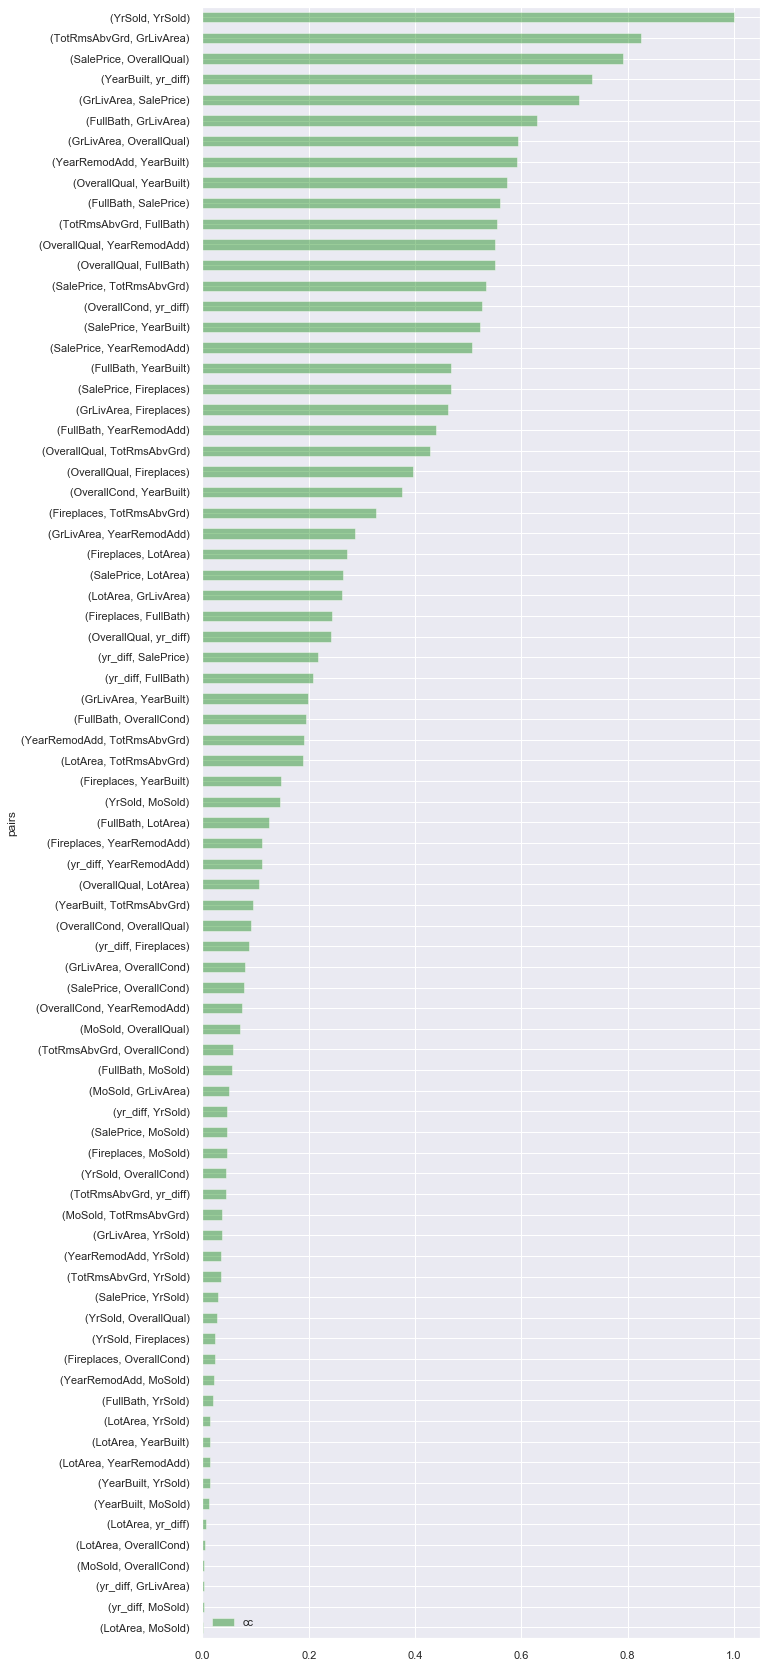

In [22]:
ccpairs_df.plot.barh(figsize=(10,30), color='green', alpha=0.4)

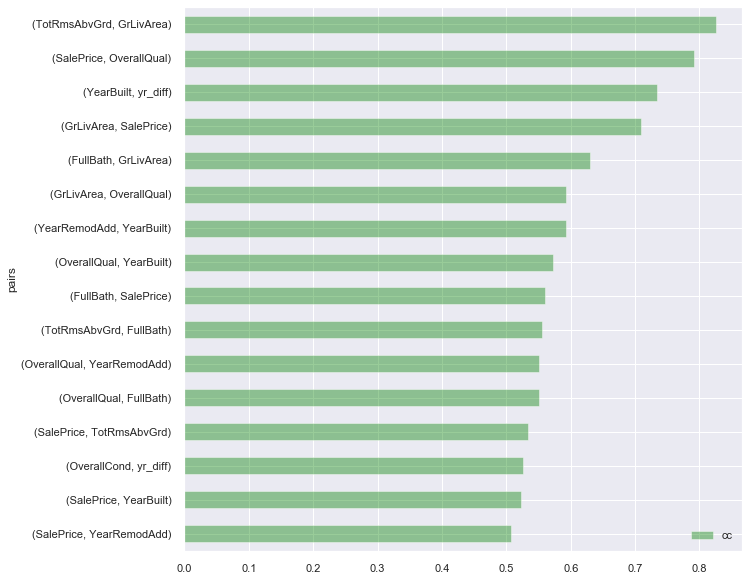

In [23]:
ccpairs_update_df = ccpairs_df[(ccpairs_df.cc>=0.5) & (ccpairs_df.cc<1)]
ccpairs_update_df.plot.barh(figsize=(10,10), color='green', alpha=0.4)

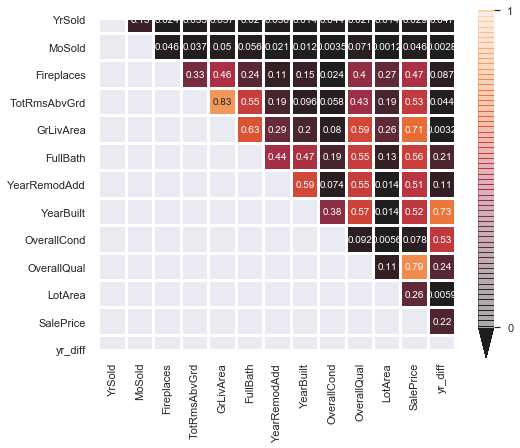

In [24]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(df.corr().abs(), mask=np.tril(df.corr().abs()), center=0.0, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

In [25]:
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [26]:
df.TotRmsAbvGrd.unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

In [27]:
df.GrLivArea.nunique()

861

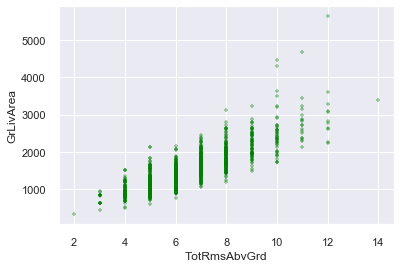

In [28]:
df.plot(kind='scatter',x='TotRmsAbvGrd',y='GrLivArea',color='green',alpha=0.4,marker='+')

In [29]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(r"$\rho$ = " + str(round(r, 2)), xy=(.1, 1.), size=15, xycoords=ax.transAxes)
    ax.annotate(f"p = {p:.3f}", xy=(.6, 1.), size=15, xycoords=ax.transAxes)

In [30]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (.2, .95), size=20, xycoords = ax.transAxes)

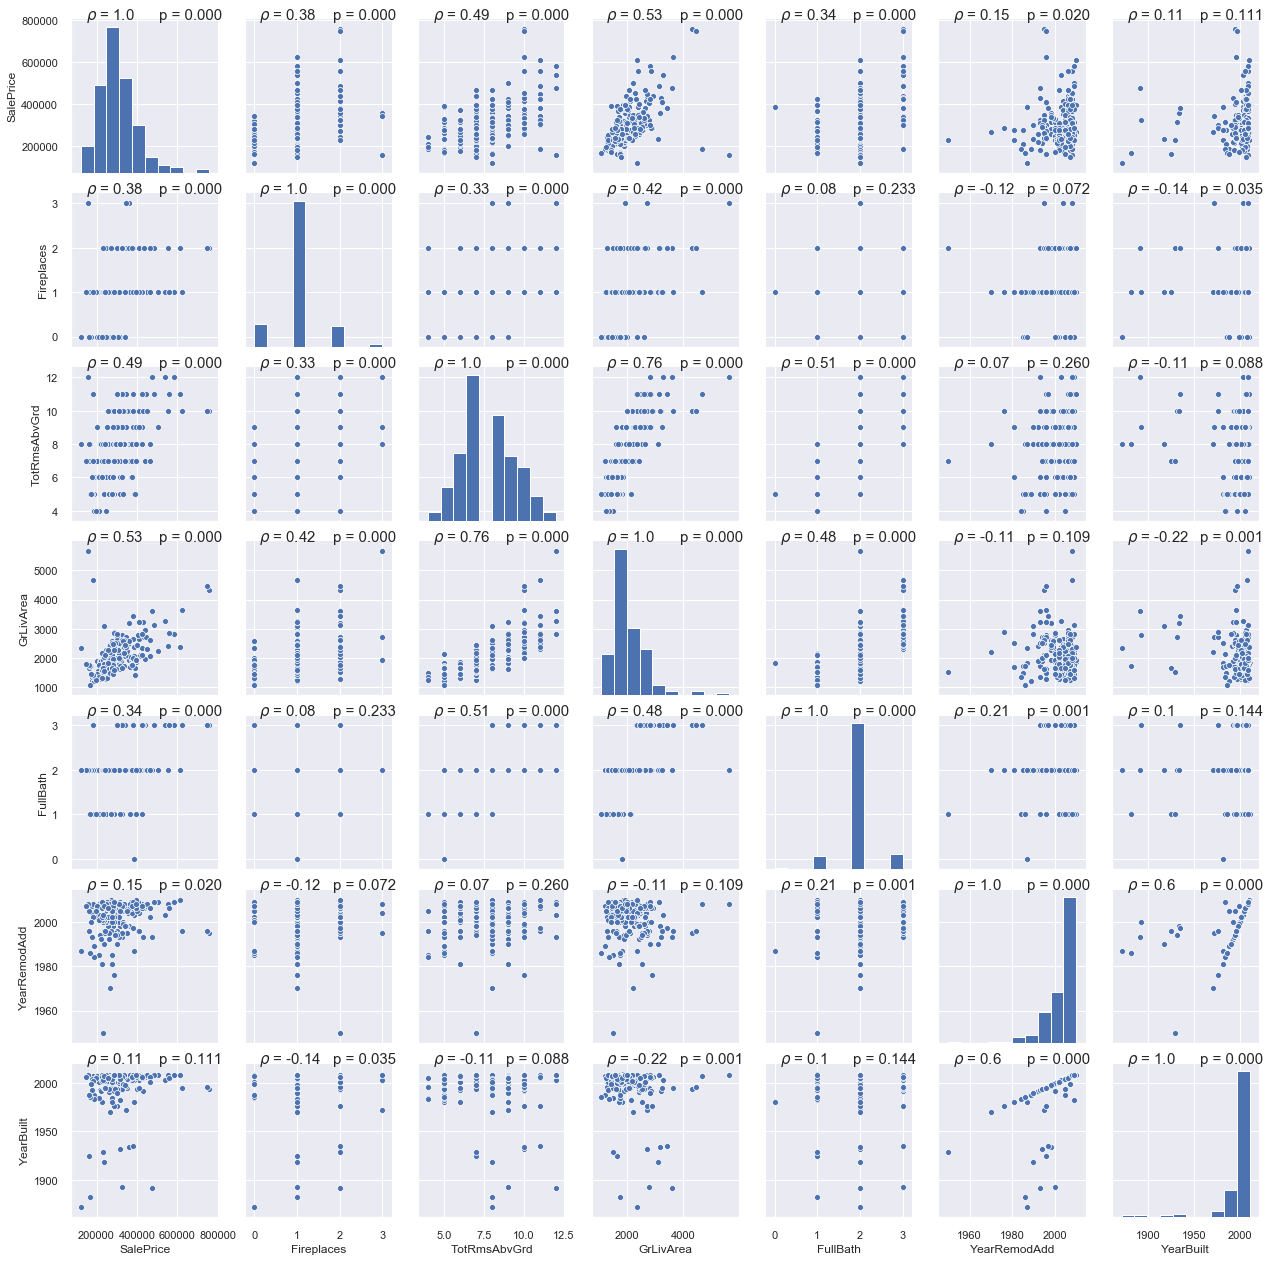

In [31]:
df1 = df[df.OverallQual>7]
feats = ['SalePrice','Fireplaces', 'TotRmsAbvGrd', 'GrLivArea', 'FullBath', 'YearRemodAdd', 'YearBuilt']
g = sns.pairplot(df1, vars = feats, palette='Dark2')
g.map(corrfunc)
plt.show()
#g.fig.set_size_inches(100,80)

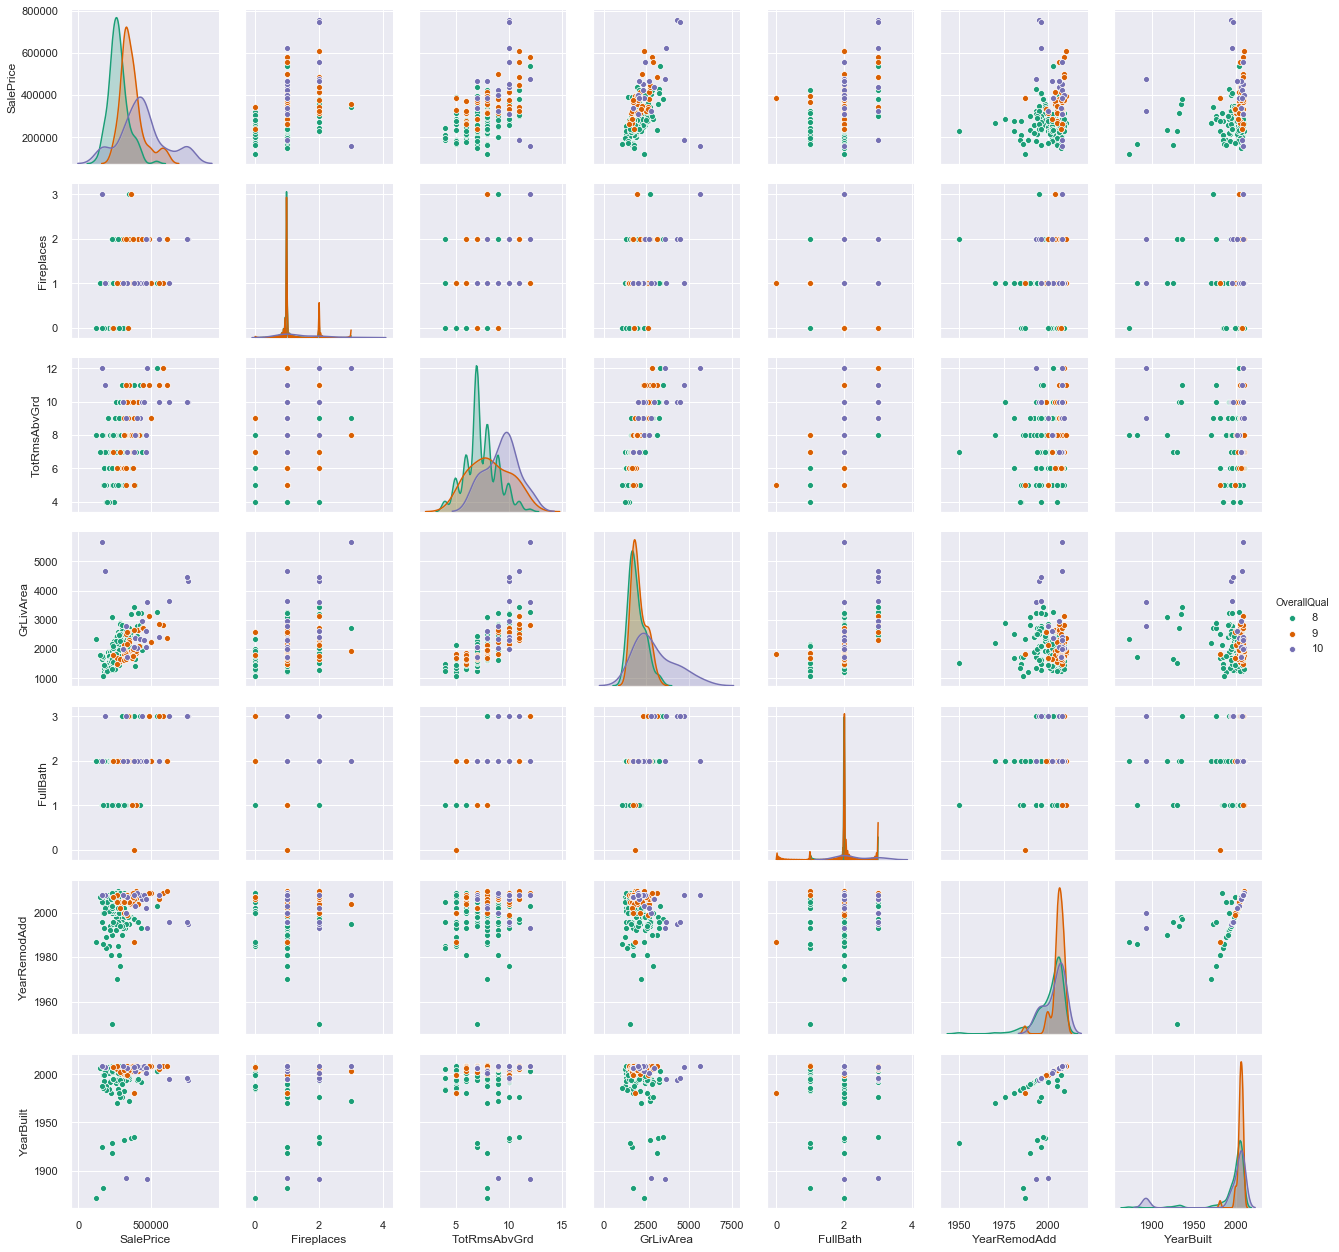

In [32]:
df1 = df[df.OverallQual>7]
feats = ['SalePrice', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea', 'FullBath', 'YearRemodAdd', 'YearBuilt']
sns.pairplot(df1, vars = feats, hue='OverallQual', palette='Dark2')

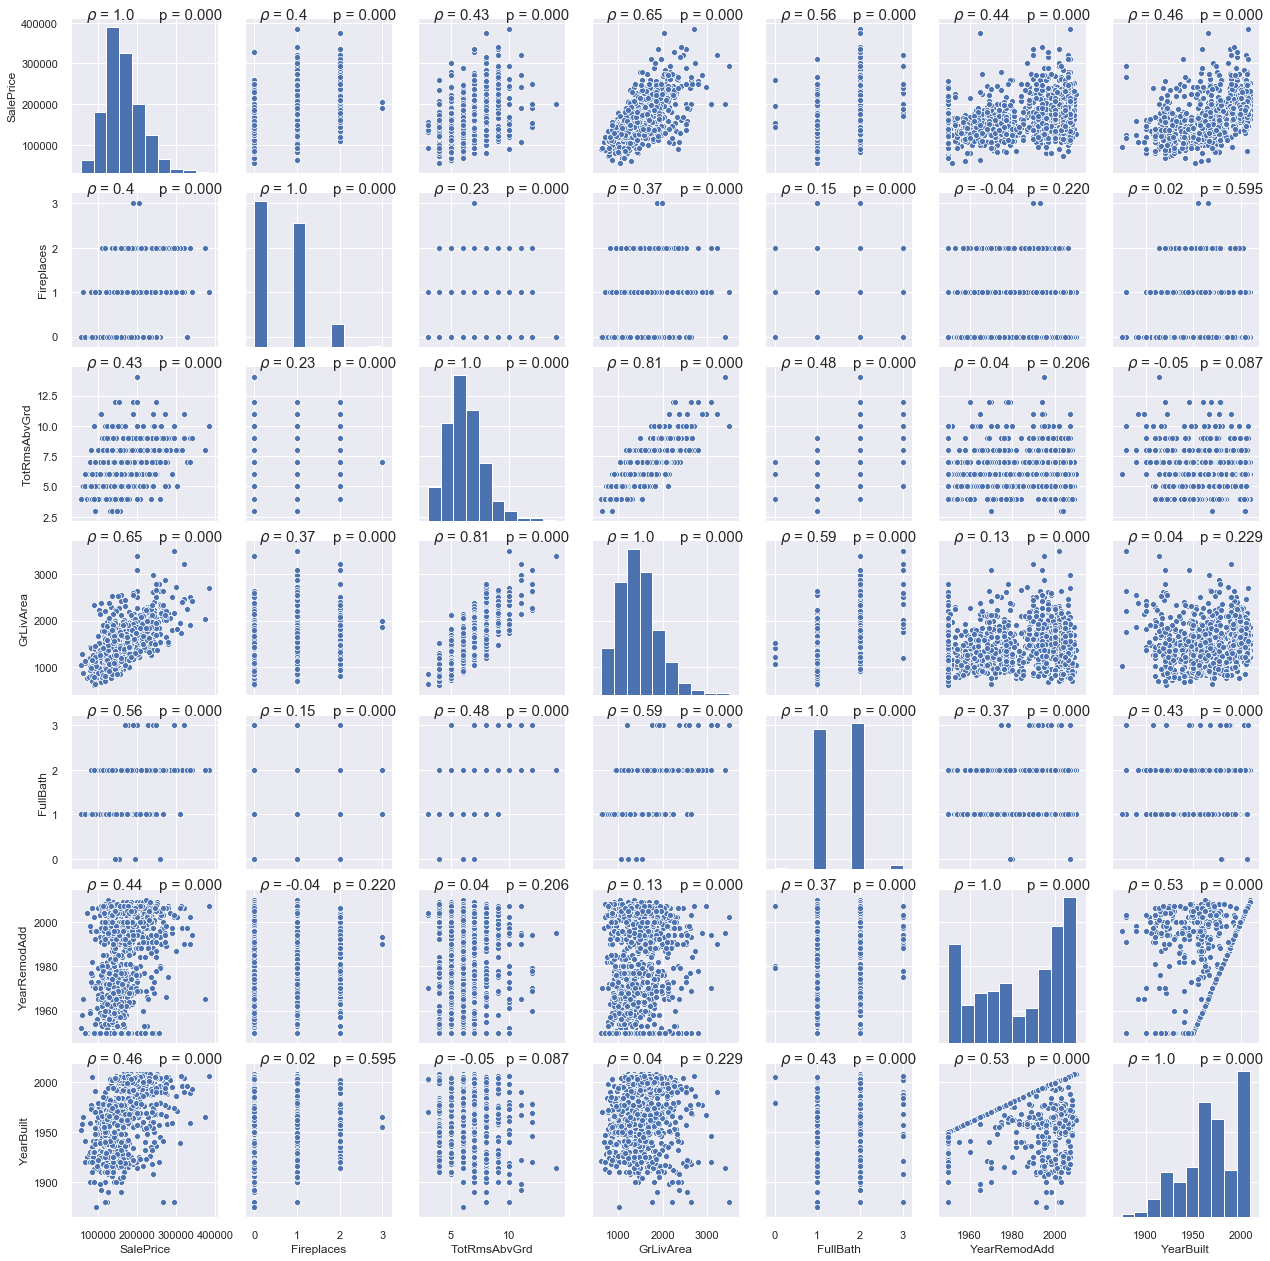

In [33]:
df2 = df[(df.OverallQual<8) & (df.OverallQual>4)]
feats = ['SalePrice','Fireplaces', 'TotRmsAbvGrd', 'GrLivArea', 'FullBath', 'YearRemodAdd', 'YearBuilt']
g = sns.pairplot(df2, vars = feats, palette='Dark2')
g.map(corrfunc)
plt.show()

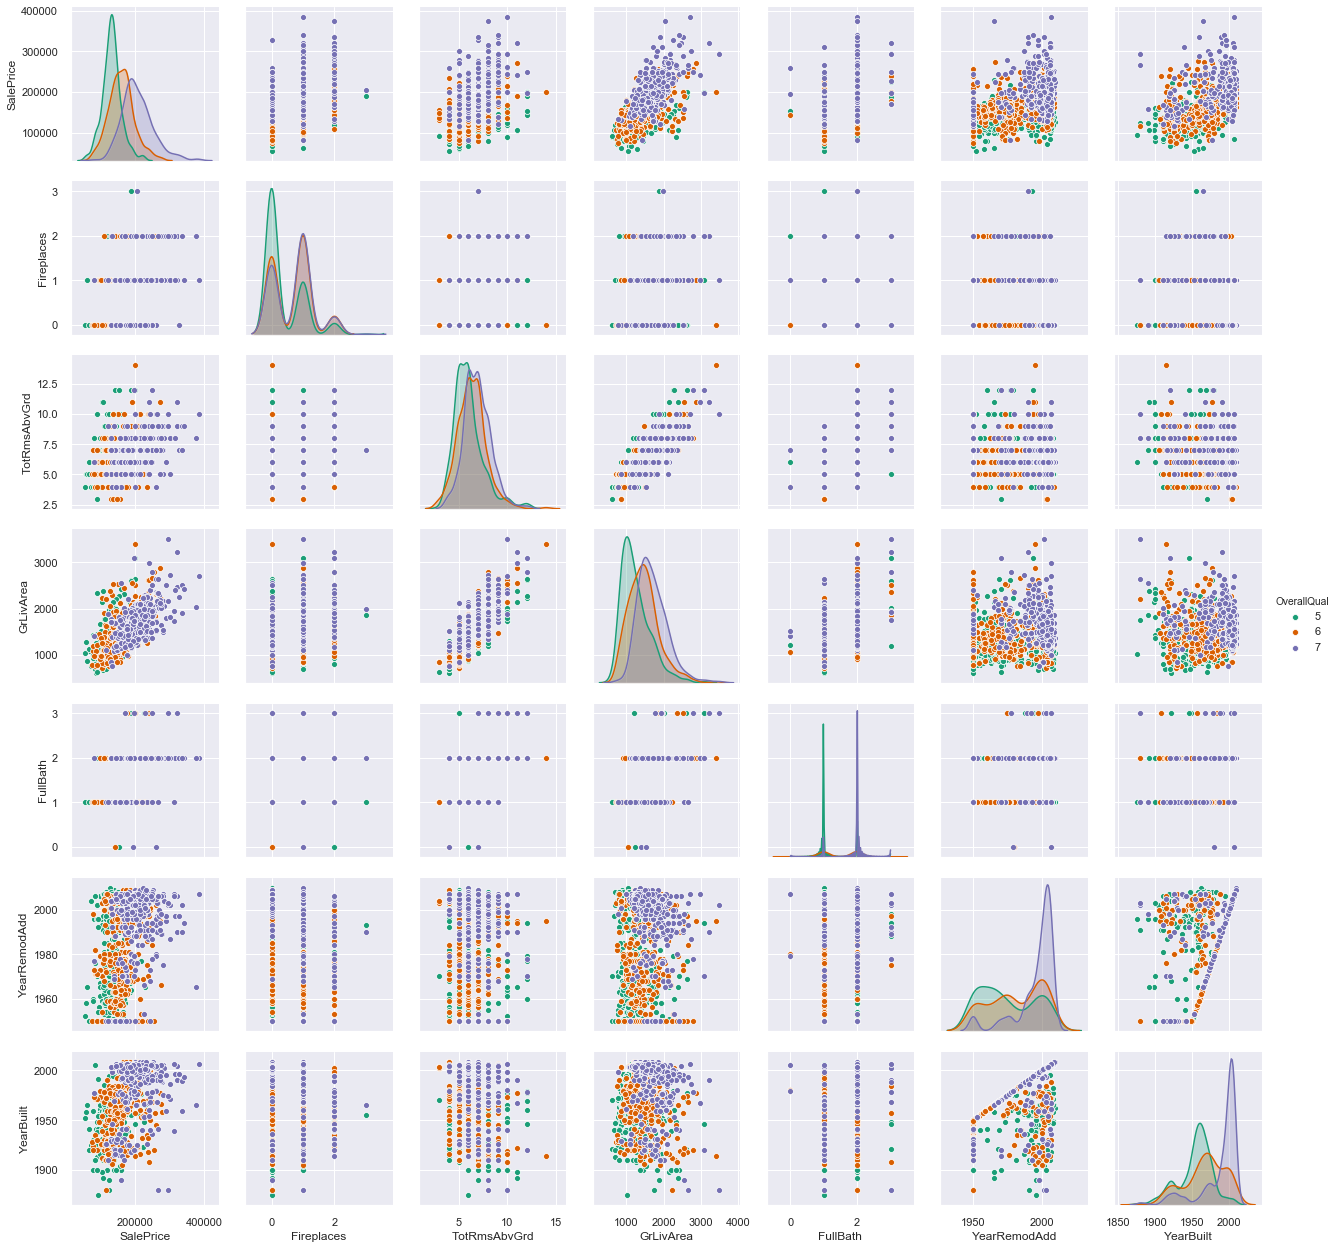

In [34]:
df2 = df[(df.OverallQual<8) & (df.OverallQual>4)]
sns.pairplot(df2, vars = feats, hue ='OverallQual', palette='Dark2')

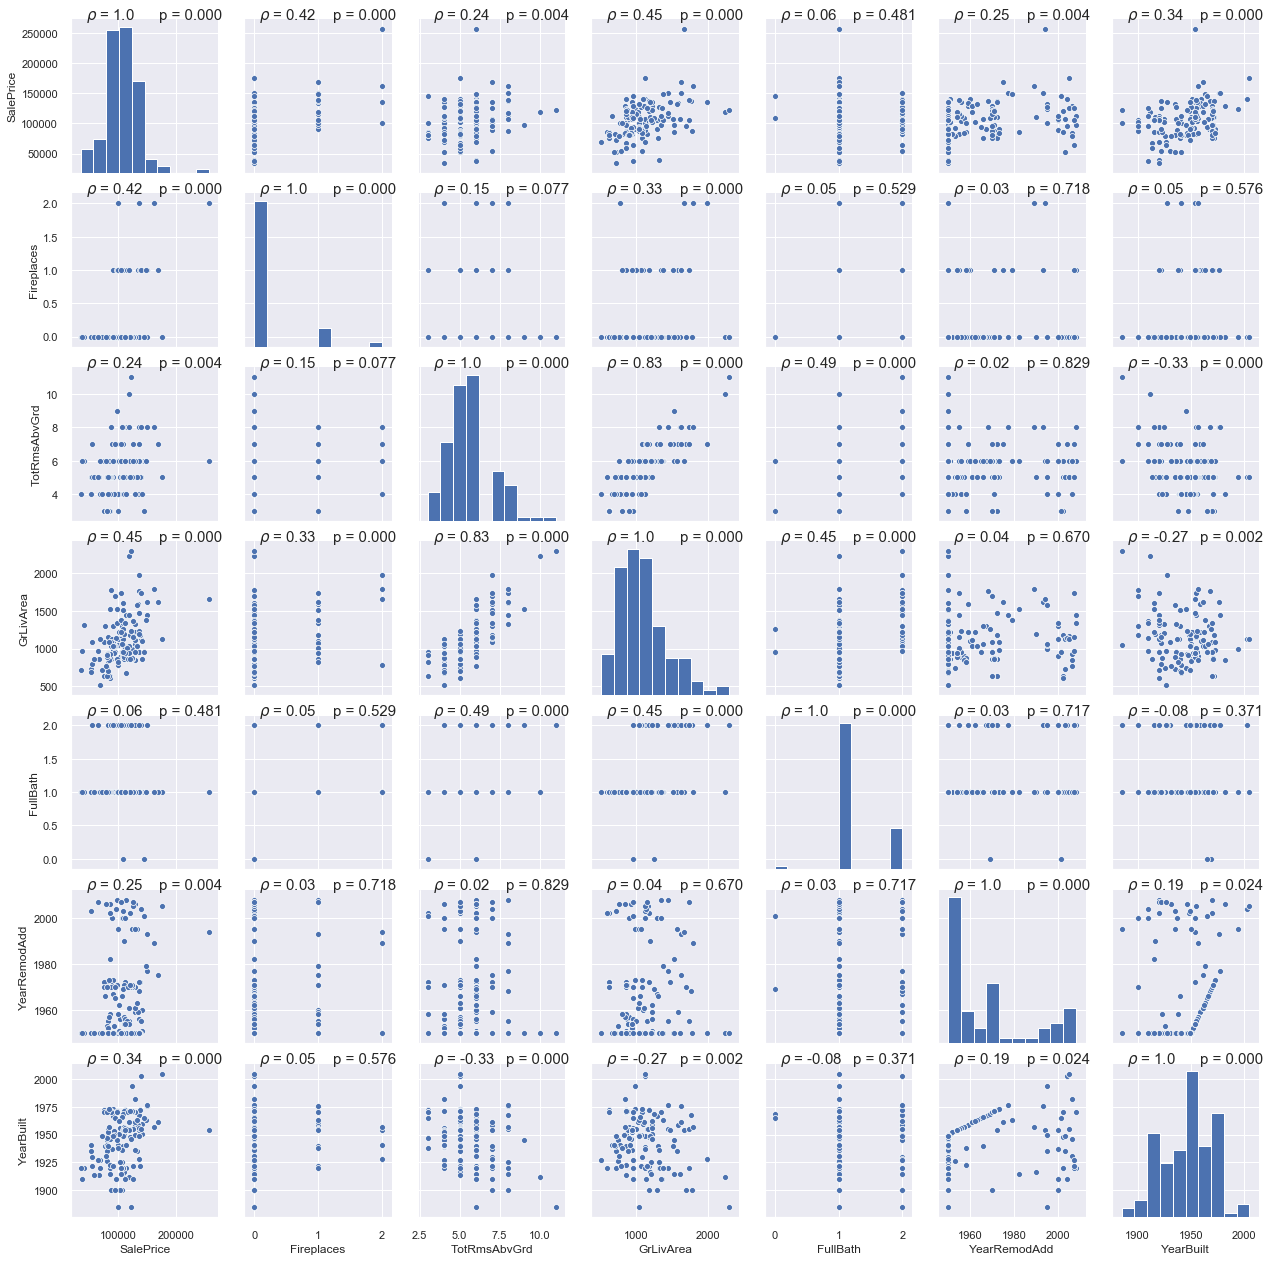

In [35]:
df3 = df[(df.OverallQual<5) & (df.OverallQual>2)]
feats = ['SalePrice','Fireplaces', 'TotRmsAbvGrd', 'GrLivArea', 'FullBath', 'YearRemodAdd', 'YearBuilt']
g = sns.pairplot(df3, vars = feats, palette='Dark2')
g.map(corrfunc)
plt.show()

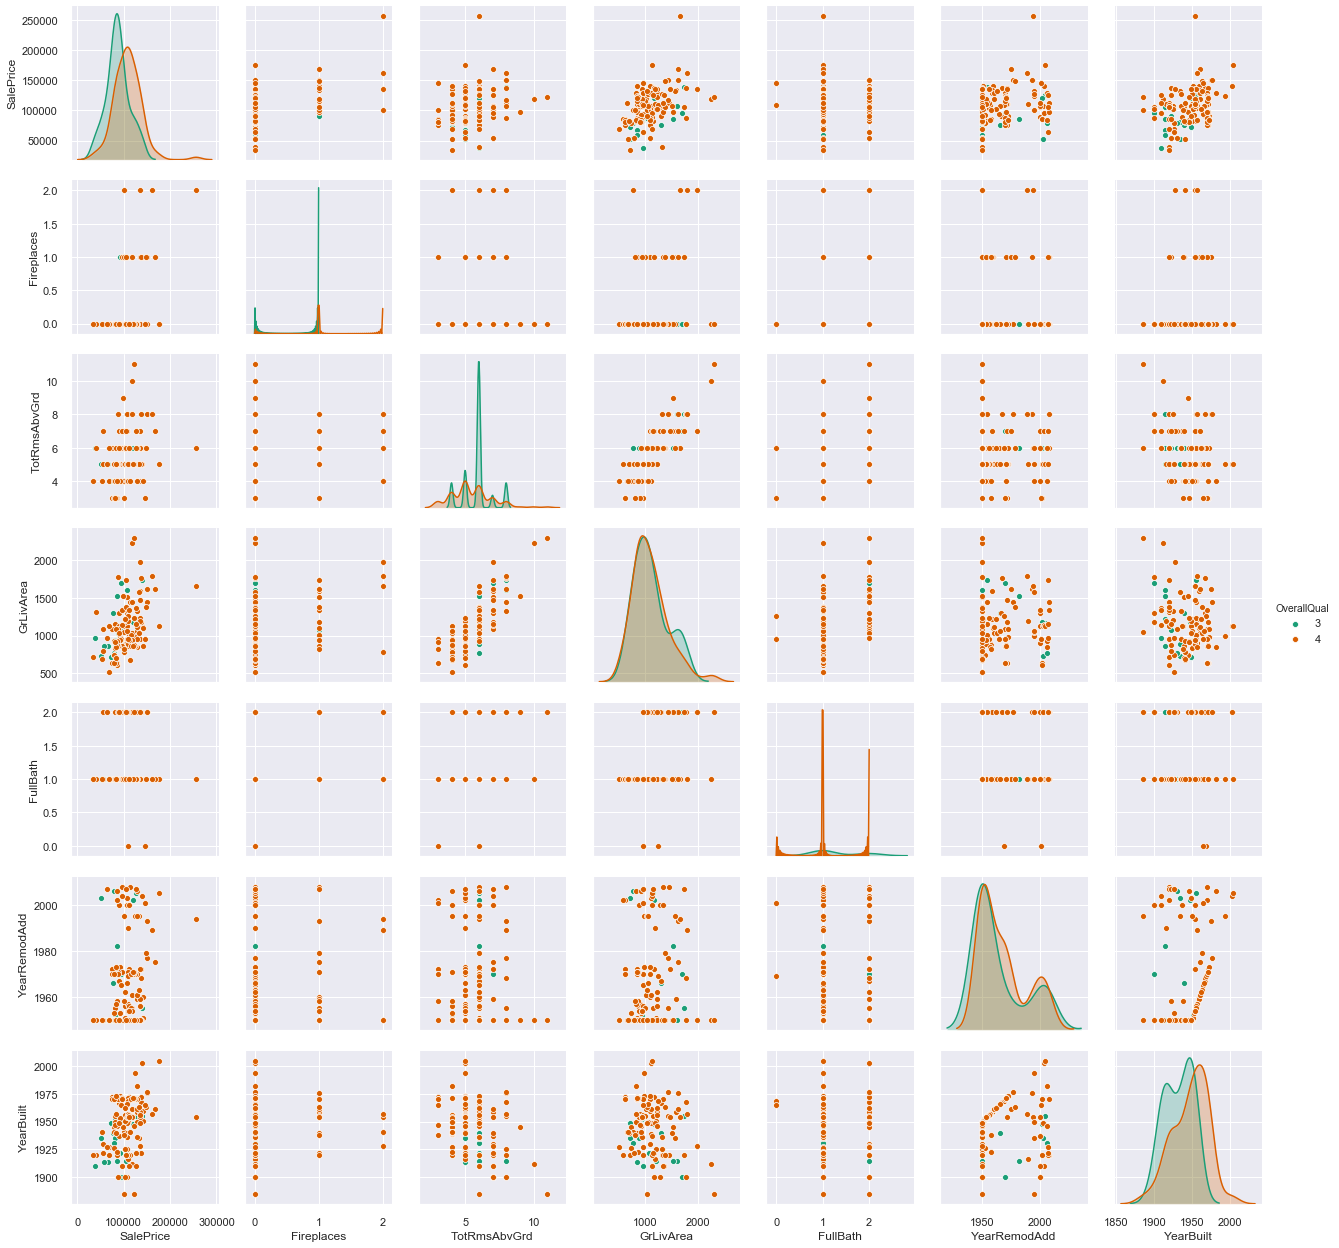

In [36]:
df3 = df[(df.OverallQual<5) & (df.OverallQual>2)]
sns.pairplot(df3, vars = feats, hue ='OverallQual', palette='Dark2')

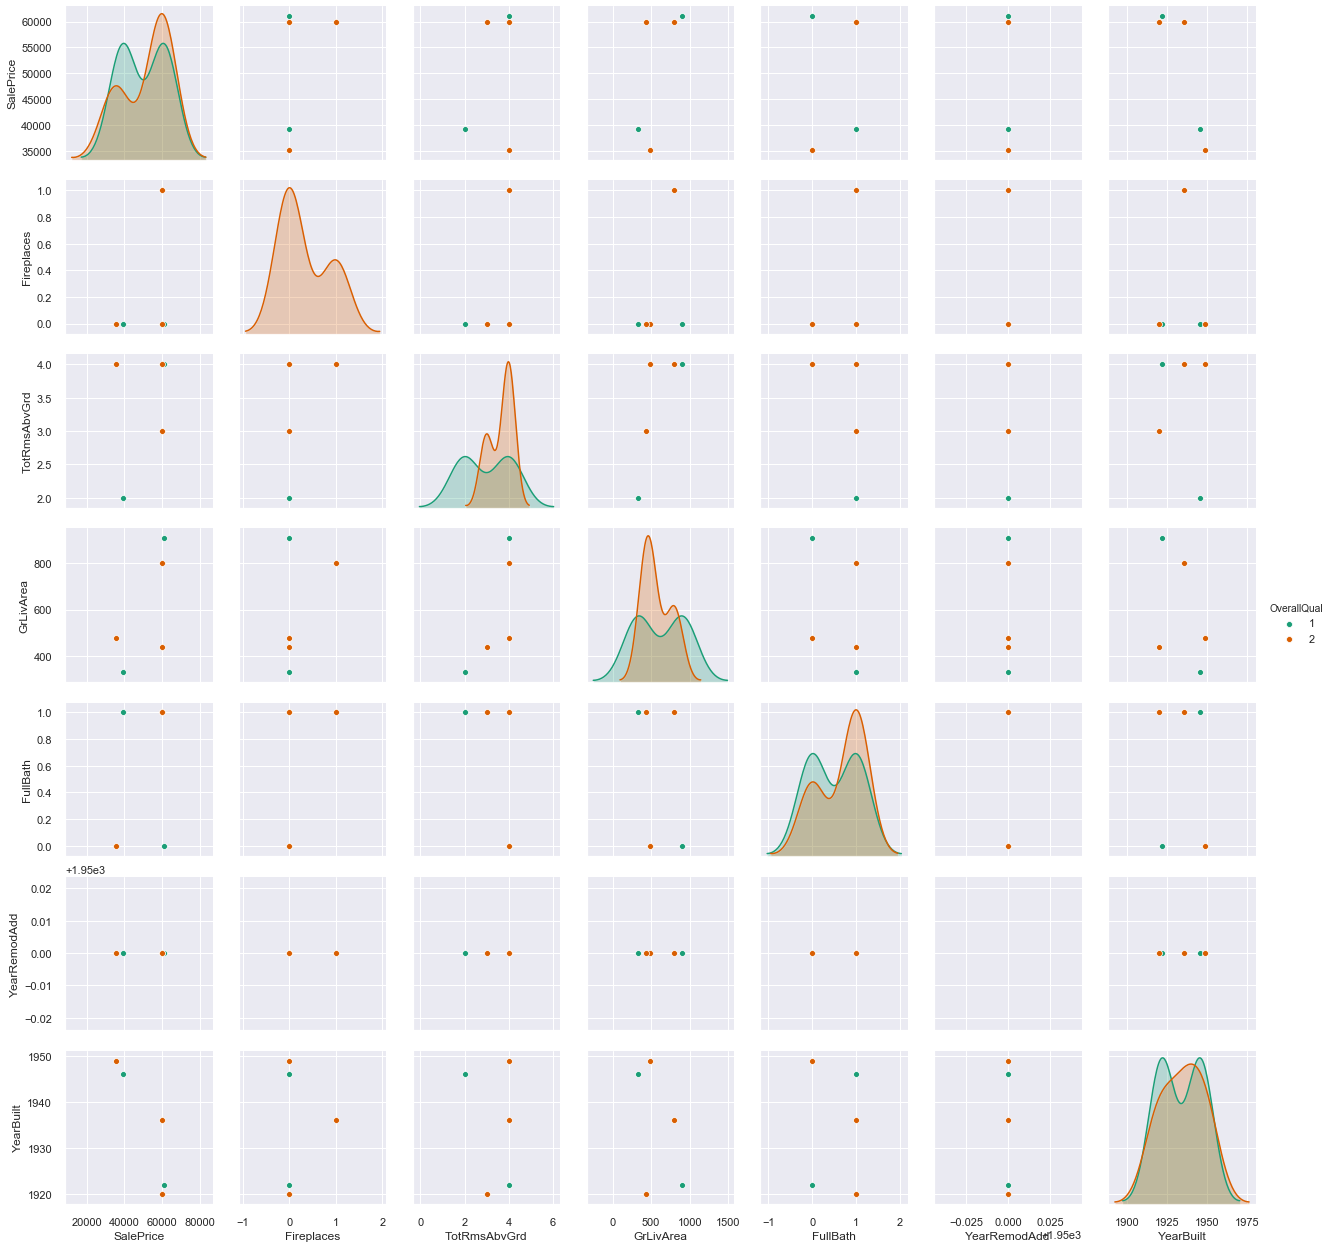

In [37]:
df4 = df[(df.OverallQual<3) & (df.OverallQual>0)]
sns.pairplot(df4, vars = feats, hue ='OverallQual', palette='Dark2')

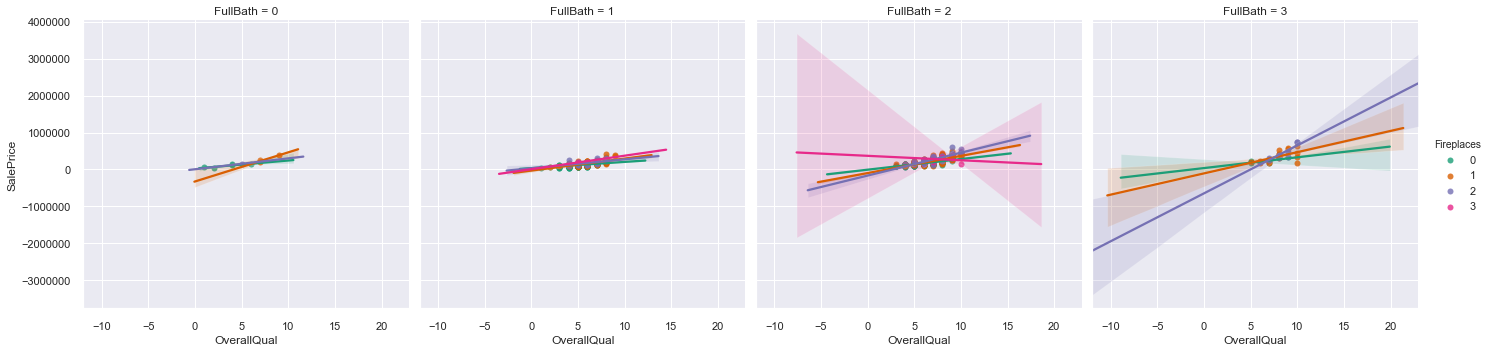

In [38]:
sns.lmplot(x ='OverallQual', y ='SalePrice', data = df, col='FullBath', hue ='Fireplaces', palette='Dark2', fit_reg=True) 

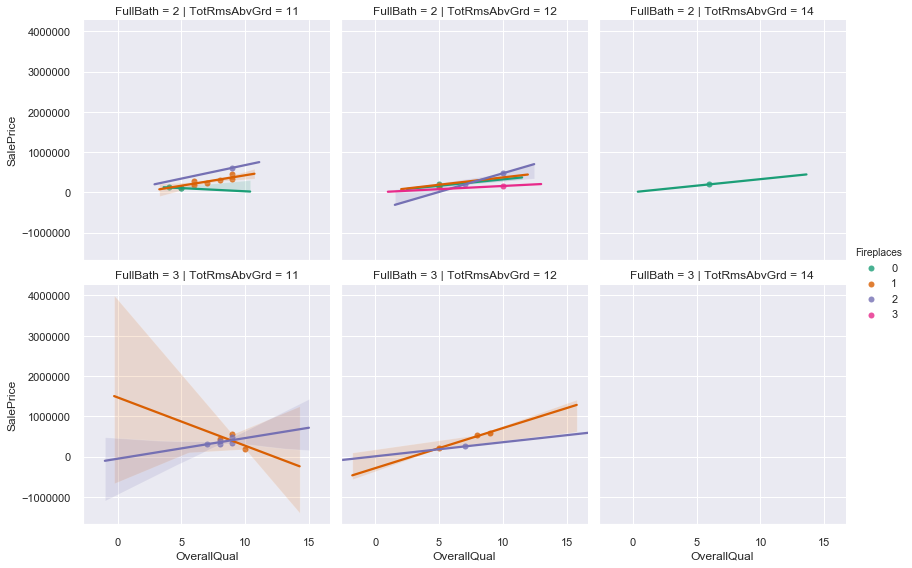

In [39]:
df_sub1 = df[df.TotRmsAbvGrd>10]
sns.lmplot(x ='OverallQual', y ='SalePrice', data = df_sub1, row='FullBath', col='TotRmsAbvGrd', hue ='Fireplaces', height=4, aspect=1, palette='Dark2', fit_reg=True) 

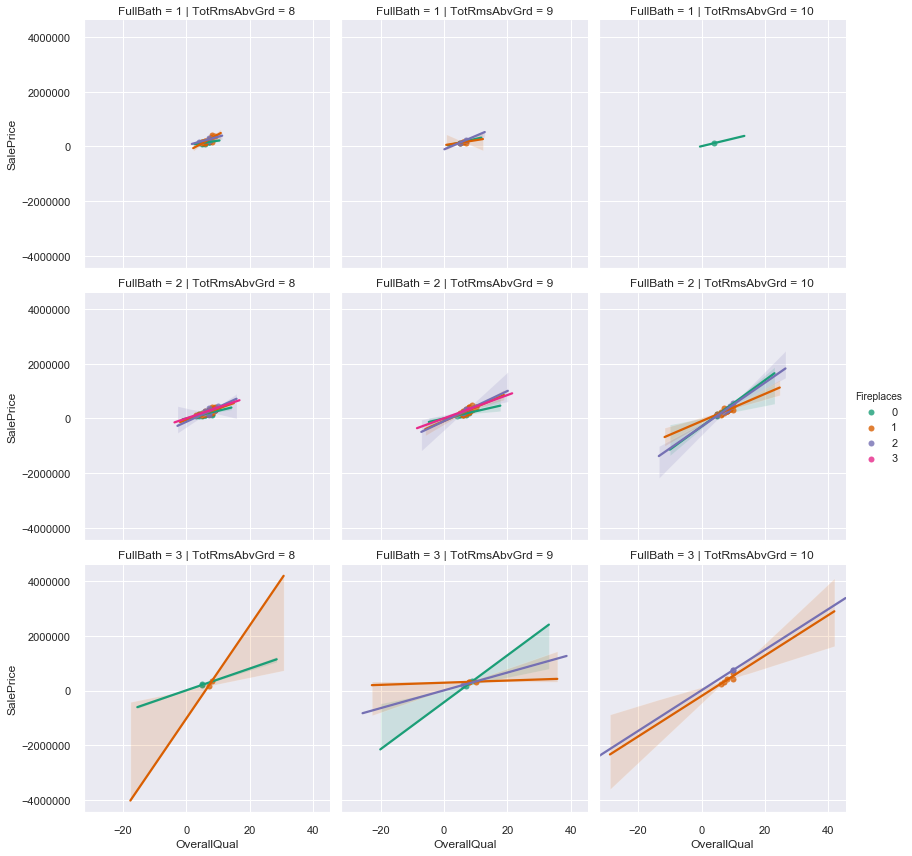

In [40]:
df_sub2 = df[(df.TotRmsAbvGrd>7) & (df.TotRmsAbvGrd<11)]
sns.lmplot(x ='OverallQual', y ='SalePrice', data = df_sub2, row='FullBath', col='TotRmsAbvGrd', hue ='Fireplaces', height=4, aspect=1, palette='Dark2', fit_reg=True) 

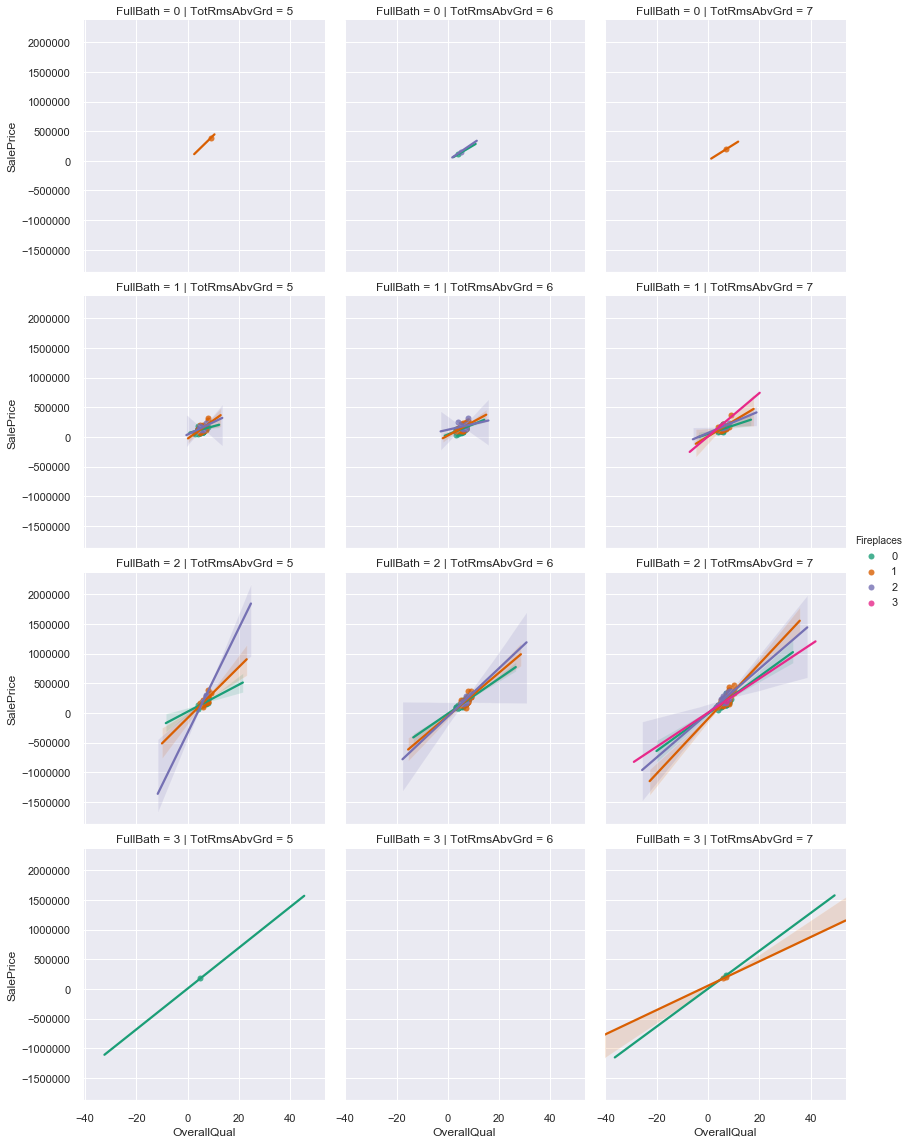

In [41]:
df_sub3 = df[(df.TotRmsAbvGrd>4) & (df.TotRmsAbvGrd<8)]
sns.lmplot(x ='OverallQual', y ='SalePrice', data = df_sub3, row='FullBath', col='TotRmsAbvGrd', hue ='Fireplaces', height=4, aspect=1, palette='Dark2', fit_reg=True) 

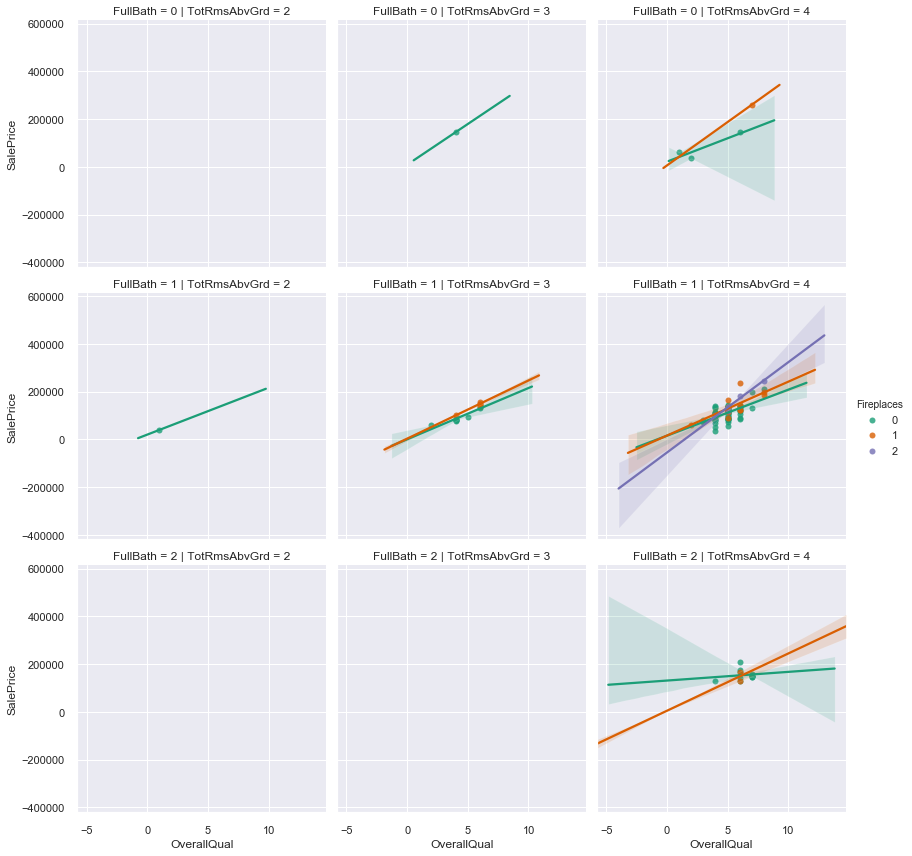

In [42]:
df_sub4 = df[(df.TotRmsAbvGrd>1) & (df.TotRmsAbvGrd<5)]
sns.lmplot(x ='OverallQual', y ='SalePrice', data = df_sub4, row='FullBath', col='TotRmsAbvGrd', hue ='Fireplaces', height=4, aspect=1, palette='Dark2', fit_reg=True) 

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~YrSold
-------------------------------------------------------------------------------------


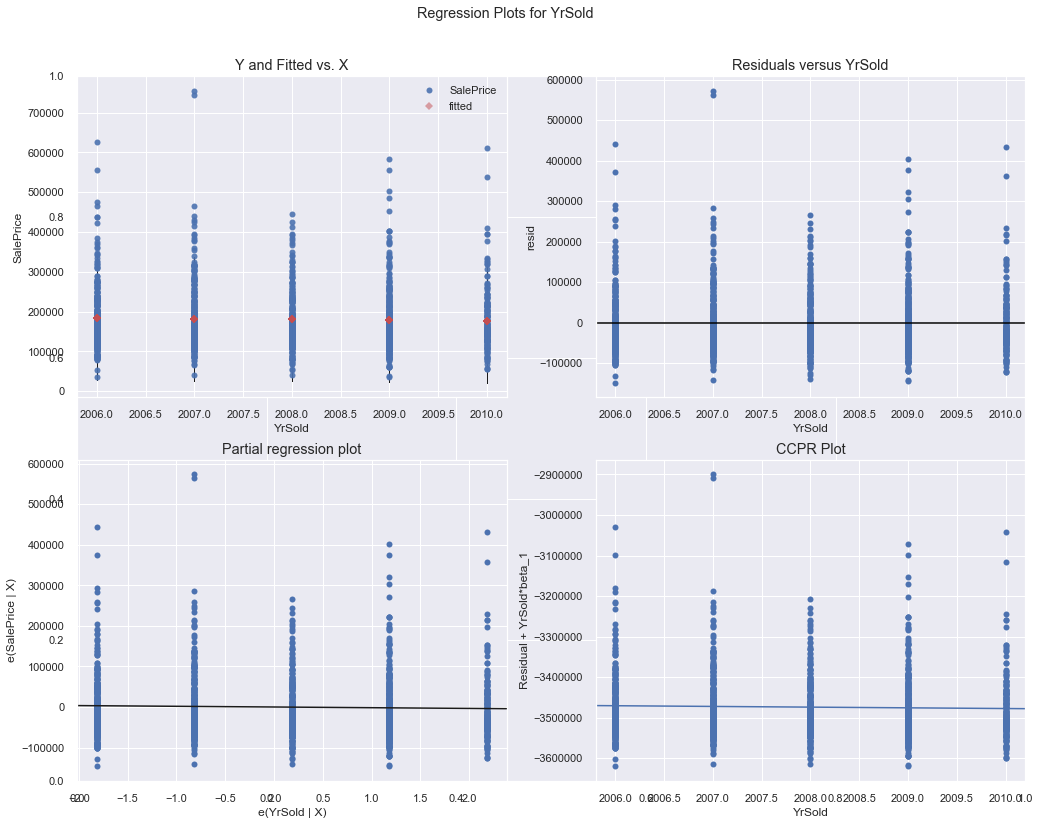

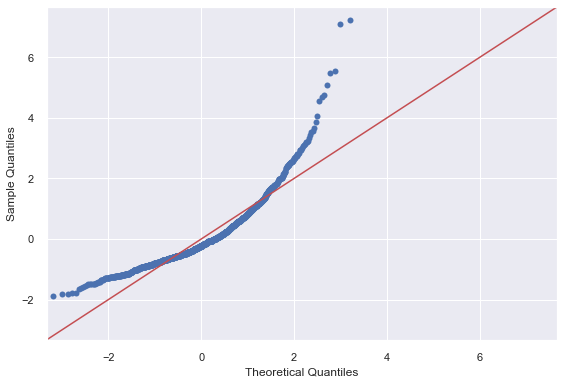

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~MoSold
-------------------------------------------------------------------------------------


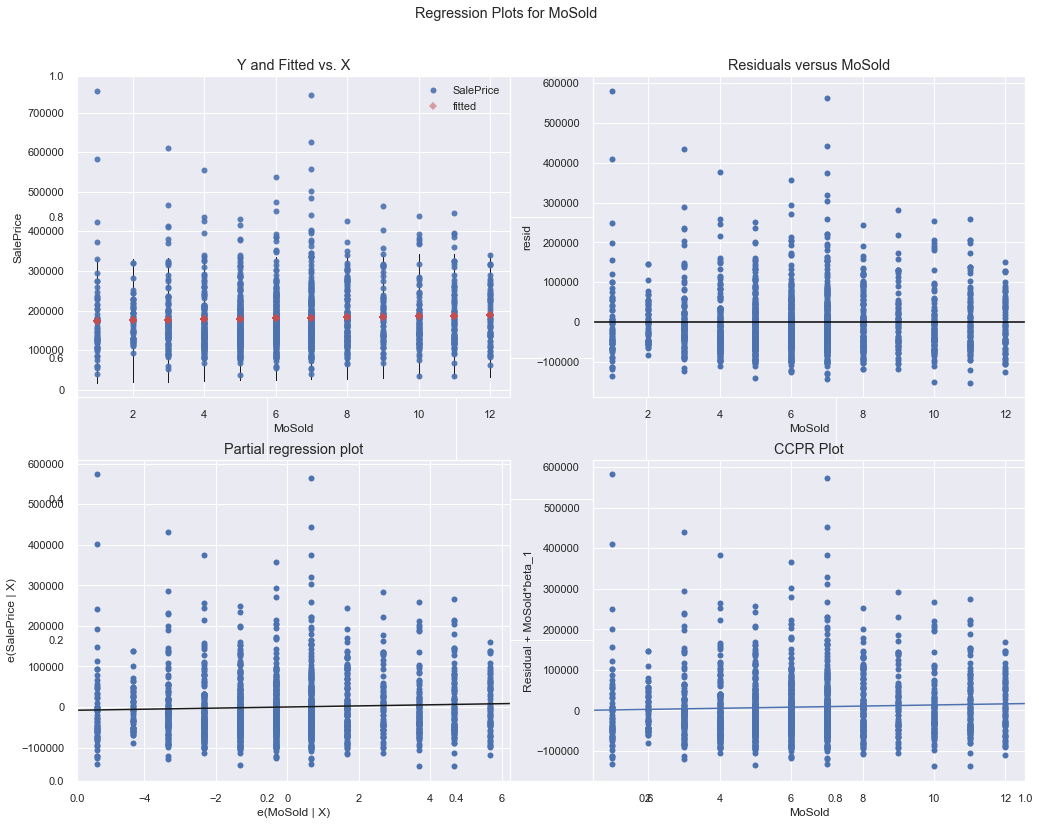

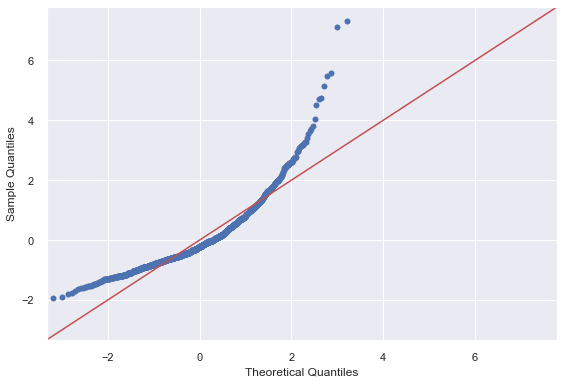

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~Fireplaces
-------------------------------------------------------------------------------------


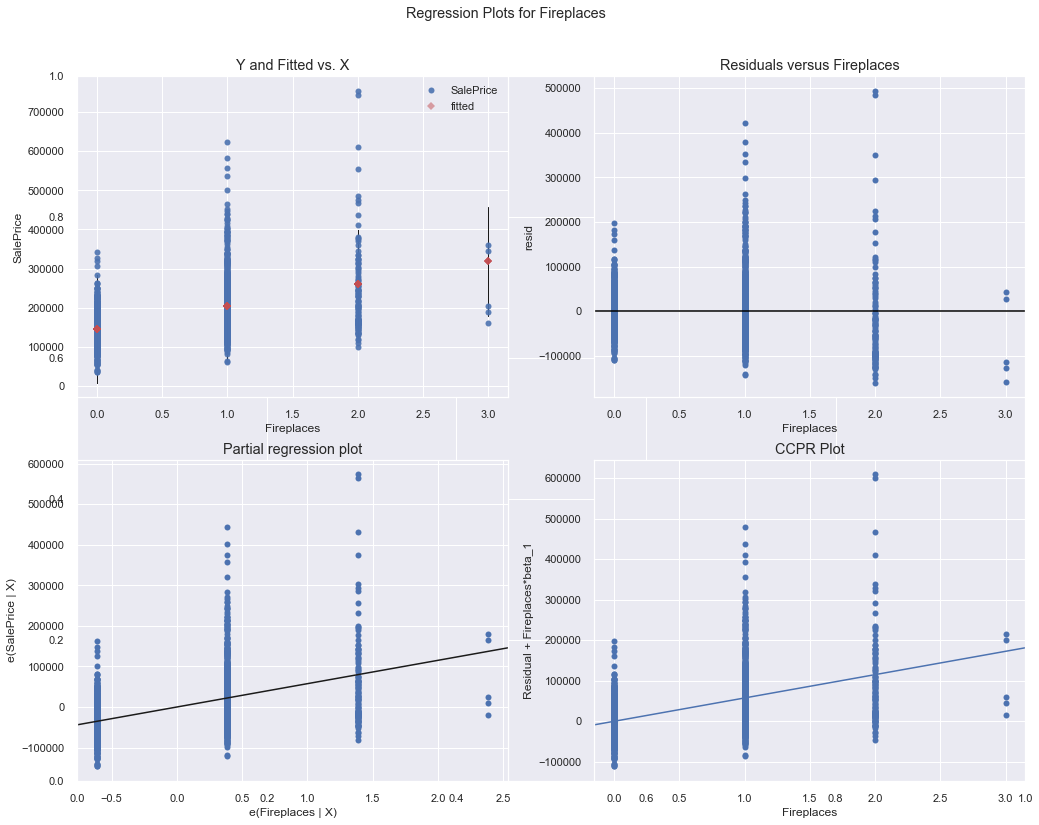

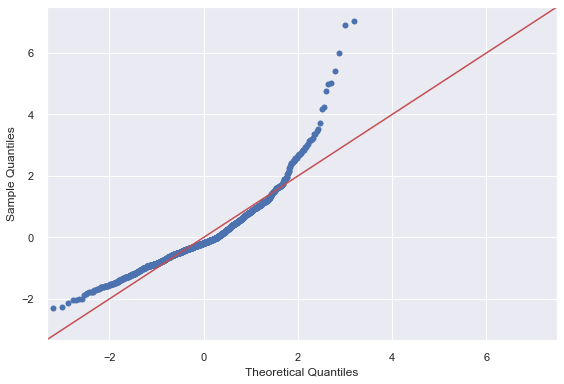

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~TotRmsAbvGrd
-------------------------------------------------------------------------------------


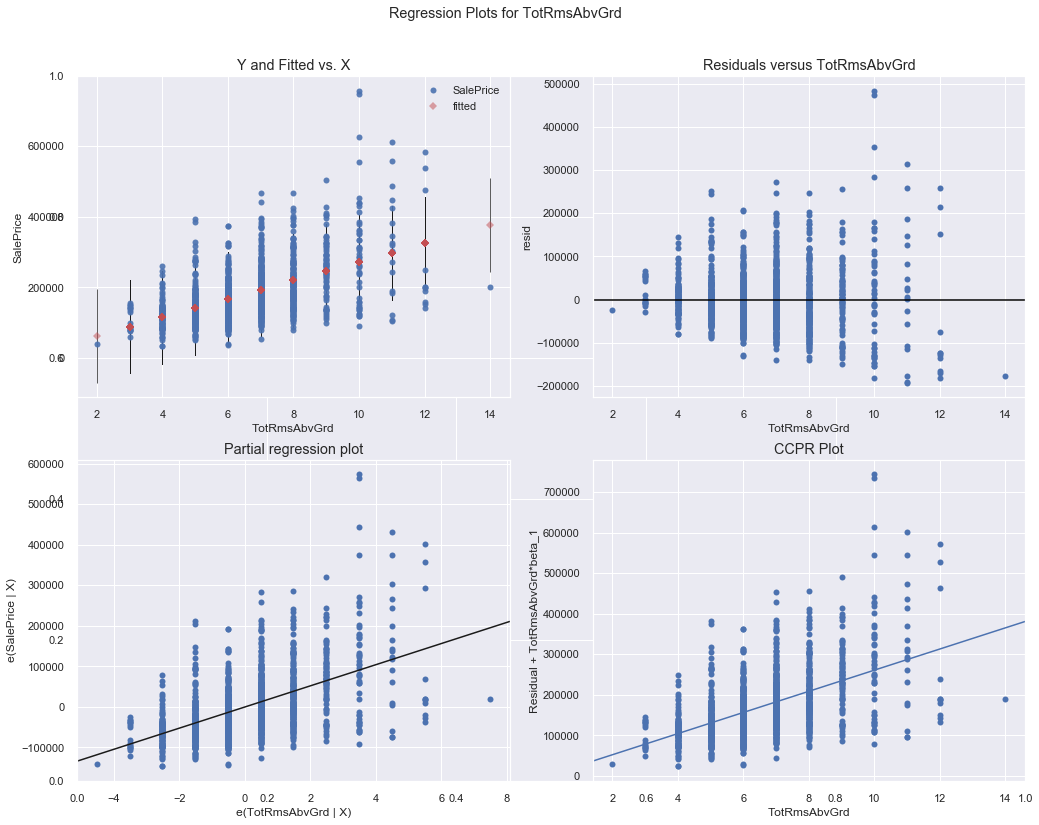

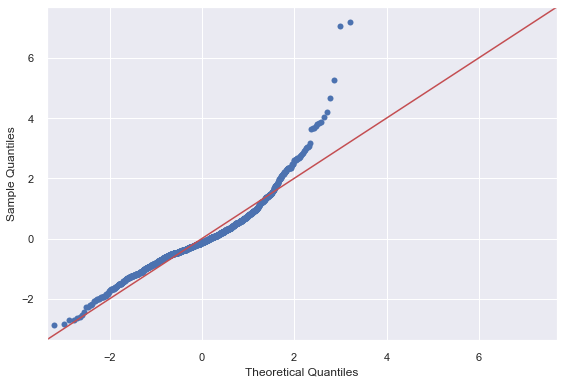

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~GrLivArea
-------------------------------------------------------------------------------------


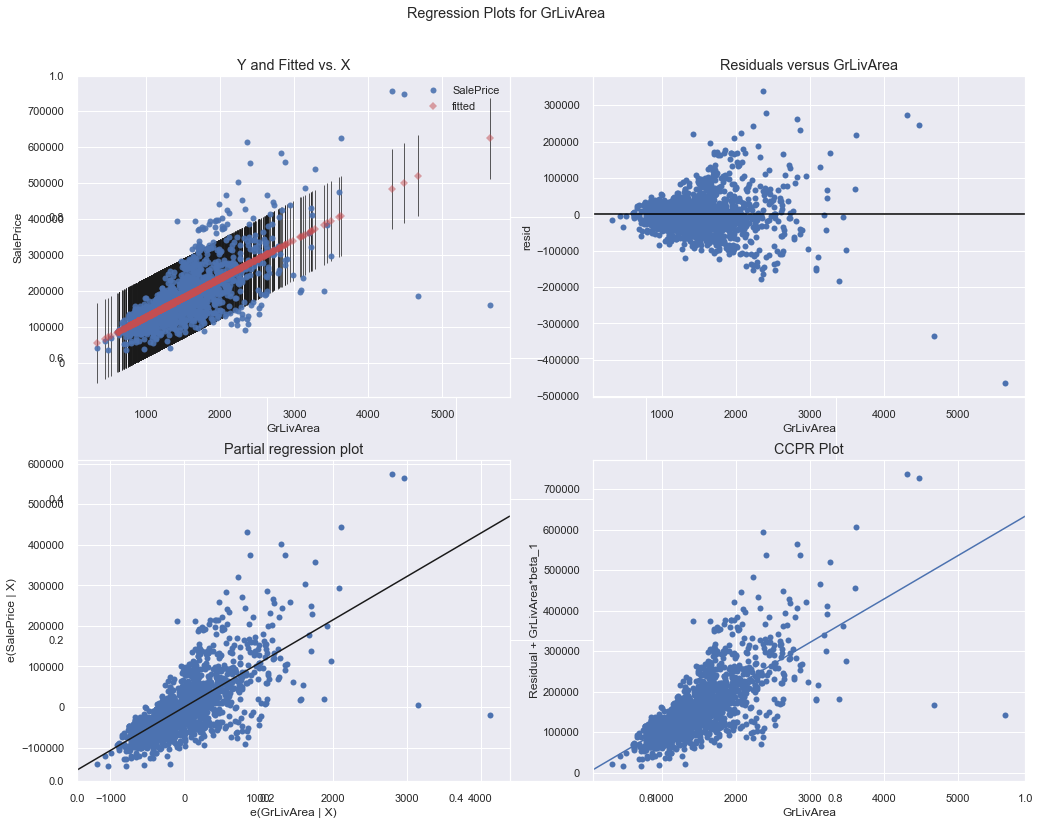

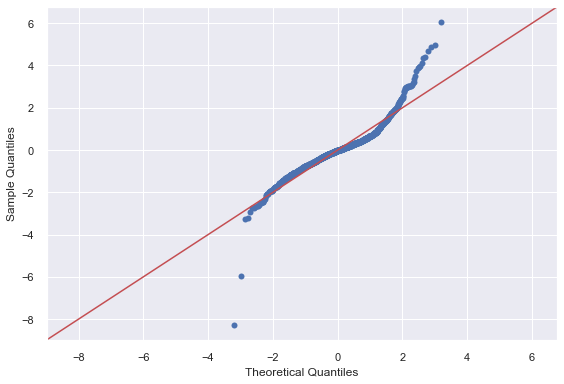

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~FullBath
-------------------------------------------------------------------------------------


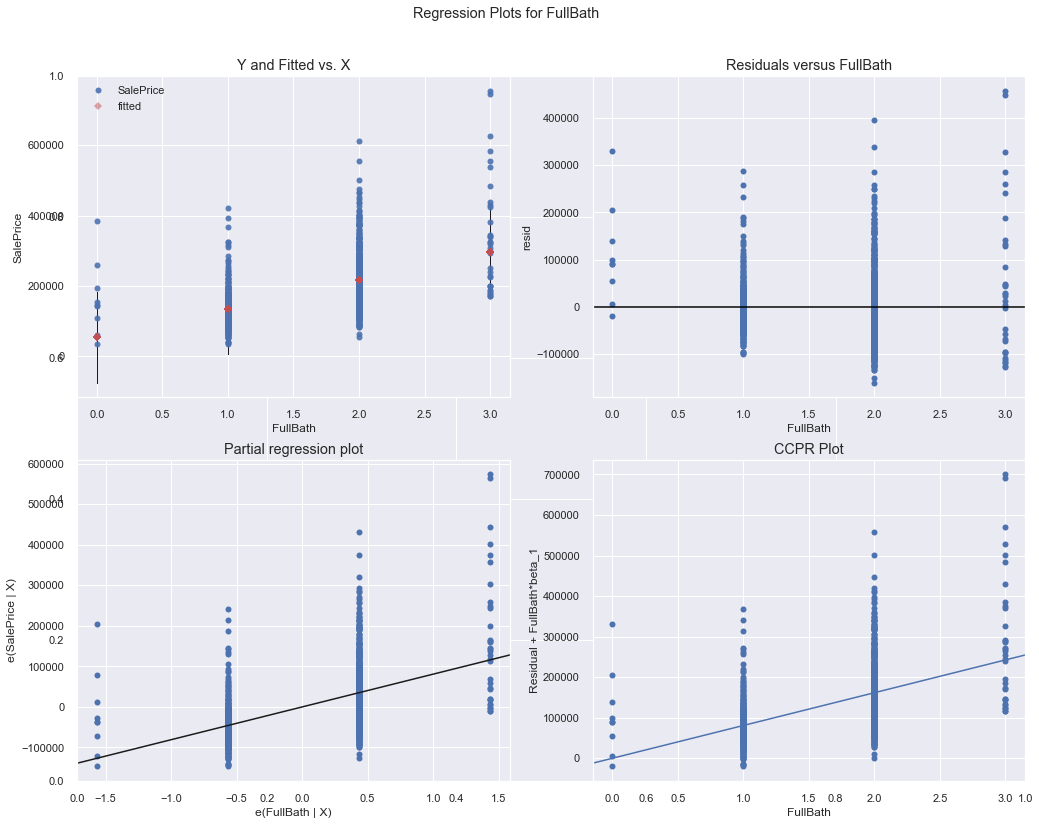

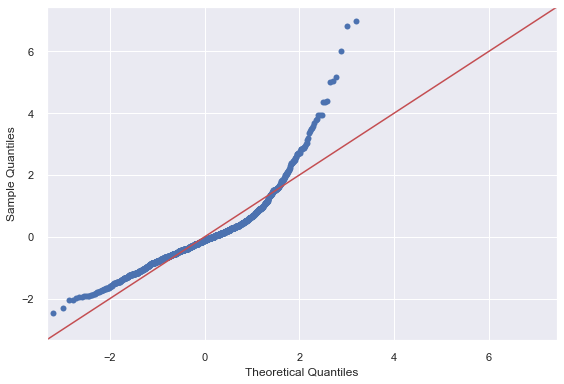

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~YearRemodAdd
-------------------------------------------------------------------------------------


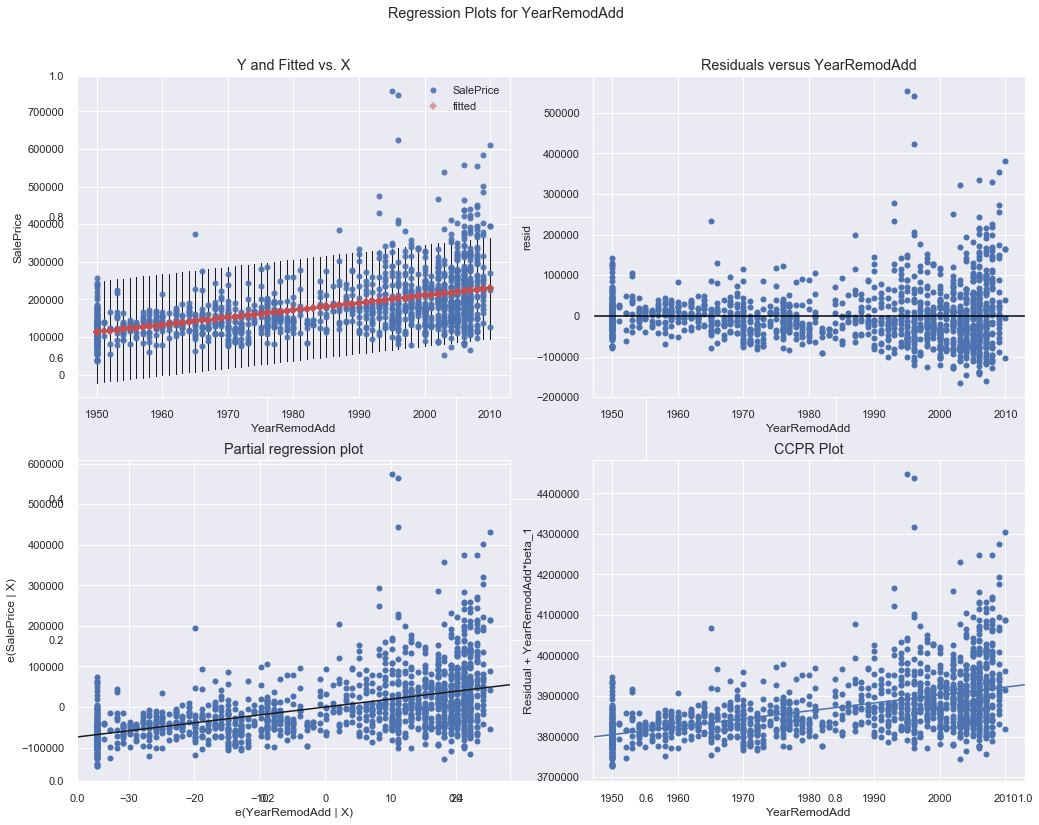

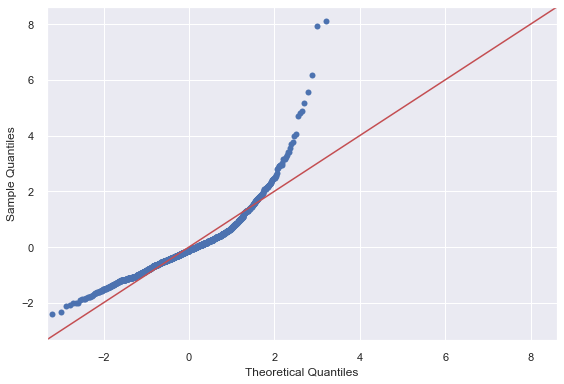

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~YearBuilt
-------------------------------------------------------------------------------------


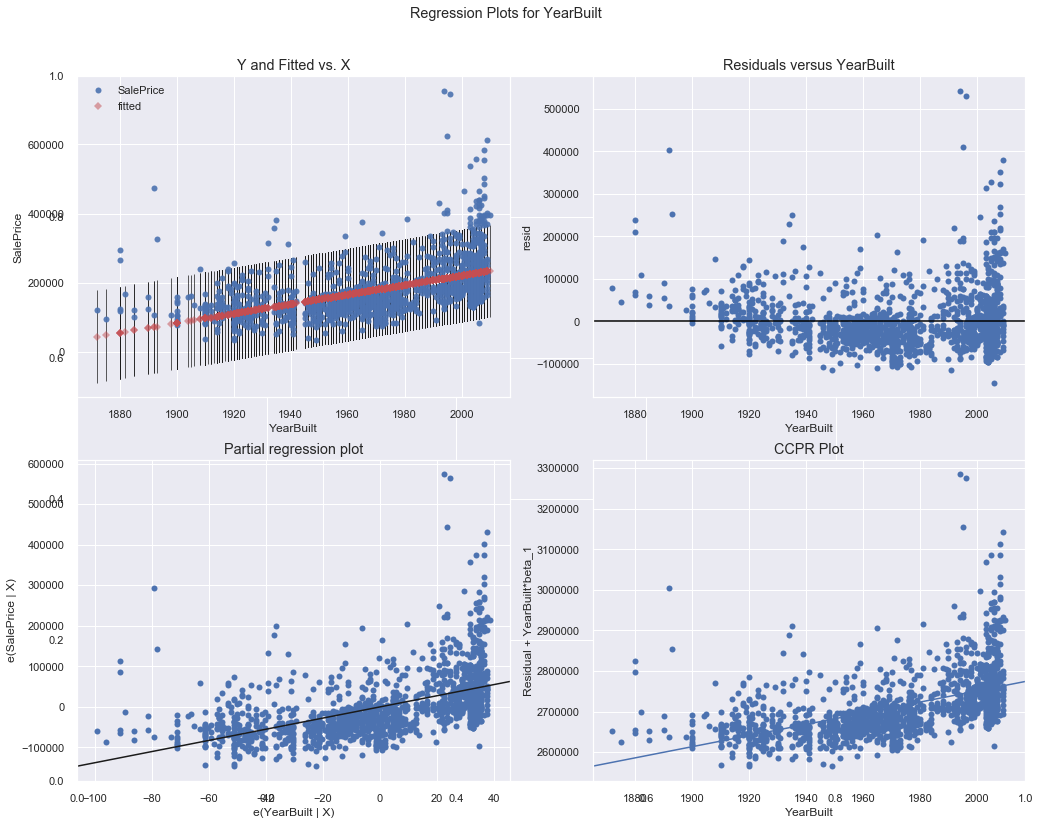

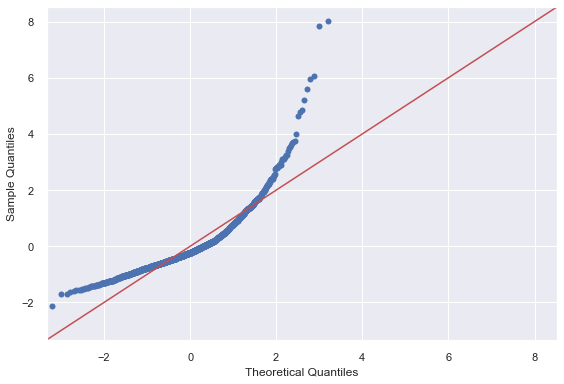

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~OverallCond
-------------------------------------------------------------------------------------


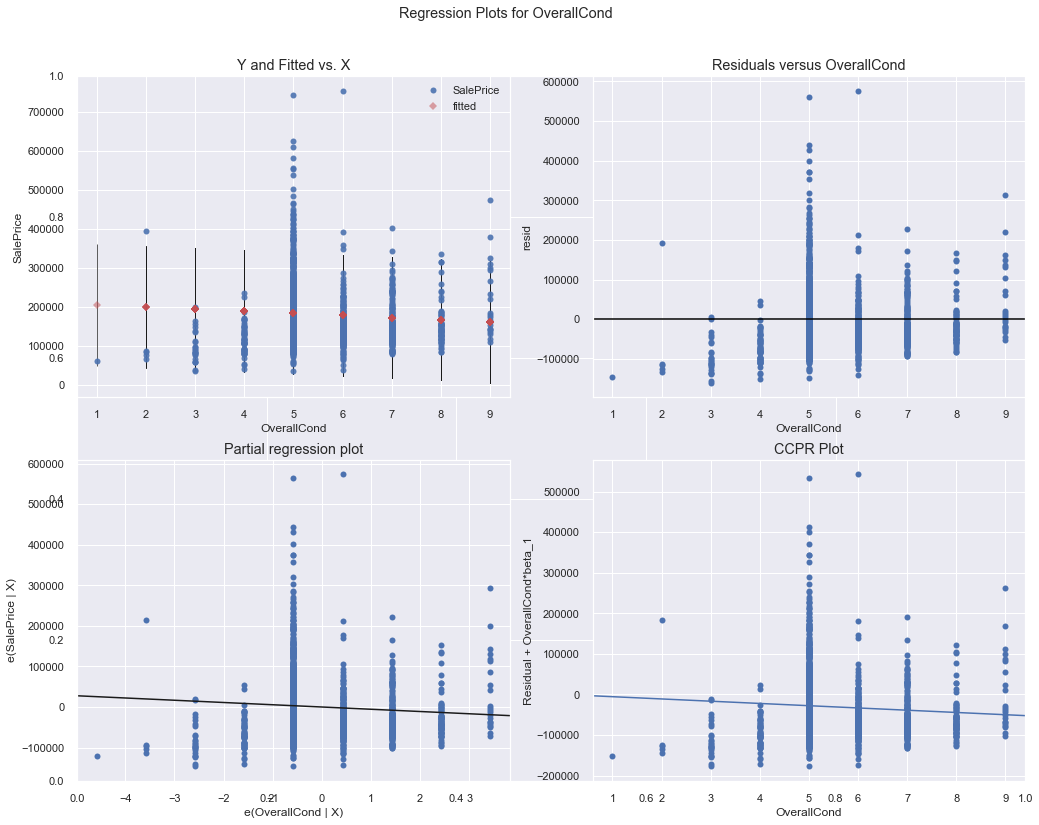

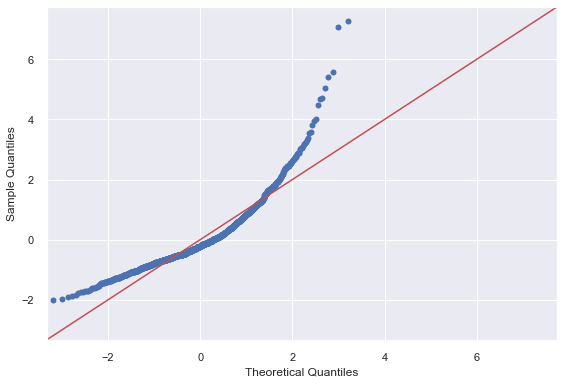

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~OverallQual
-------------------------------------------------------------------------------------


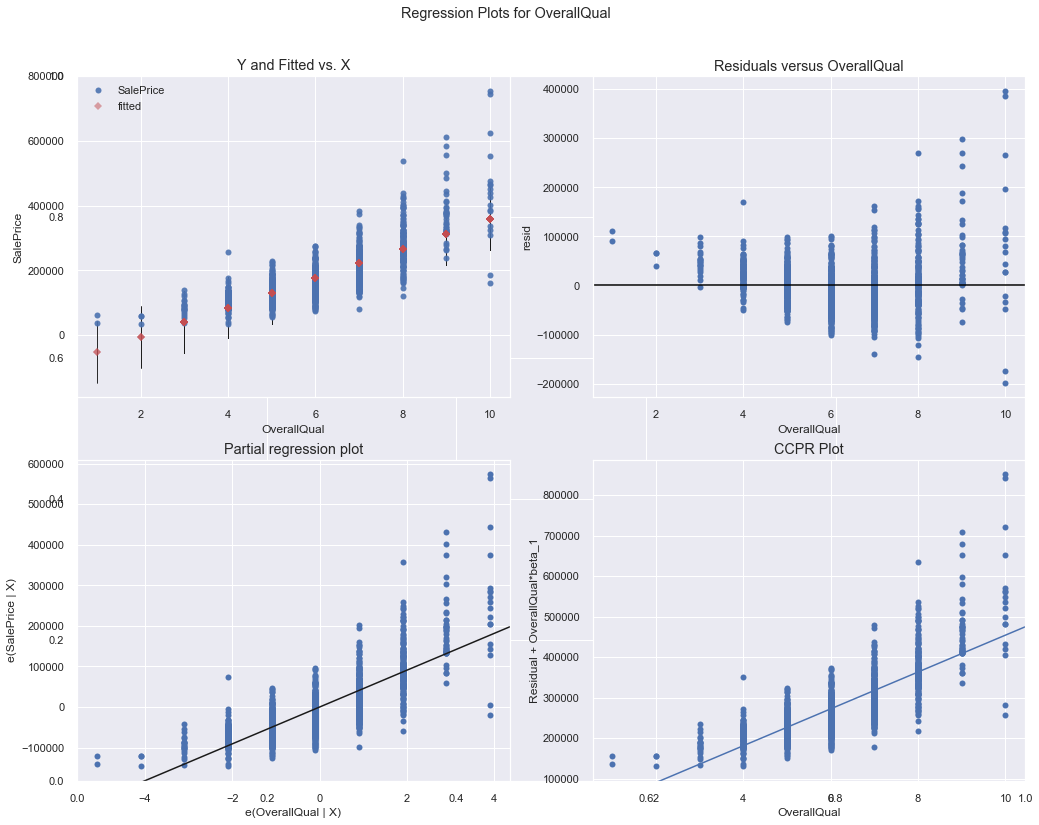

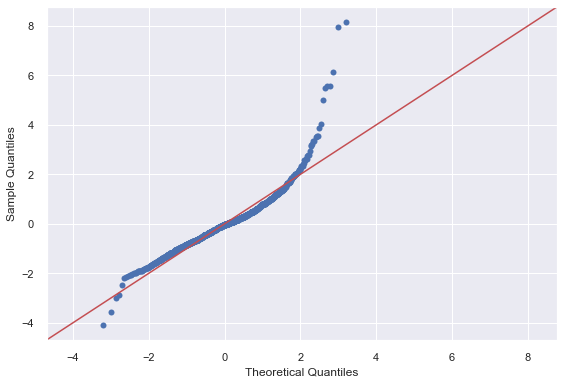

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~LotArea
-------------------------------------------------------------------------------------


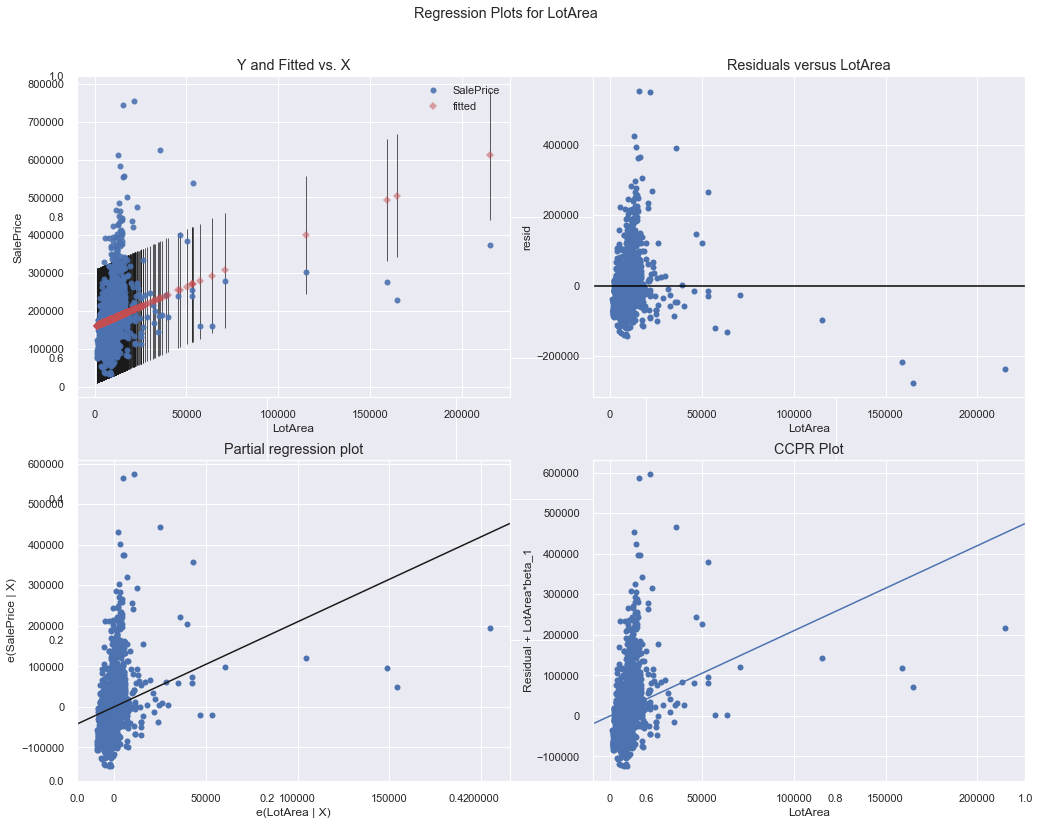

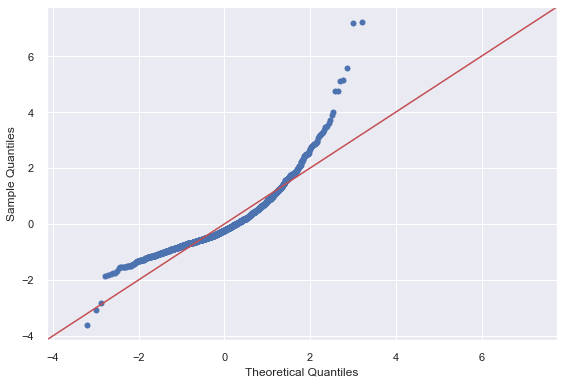

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~SalePrice
-------------------------------------------------------------------------------------


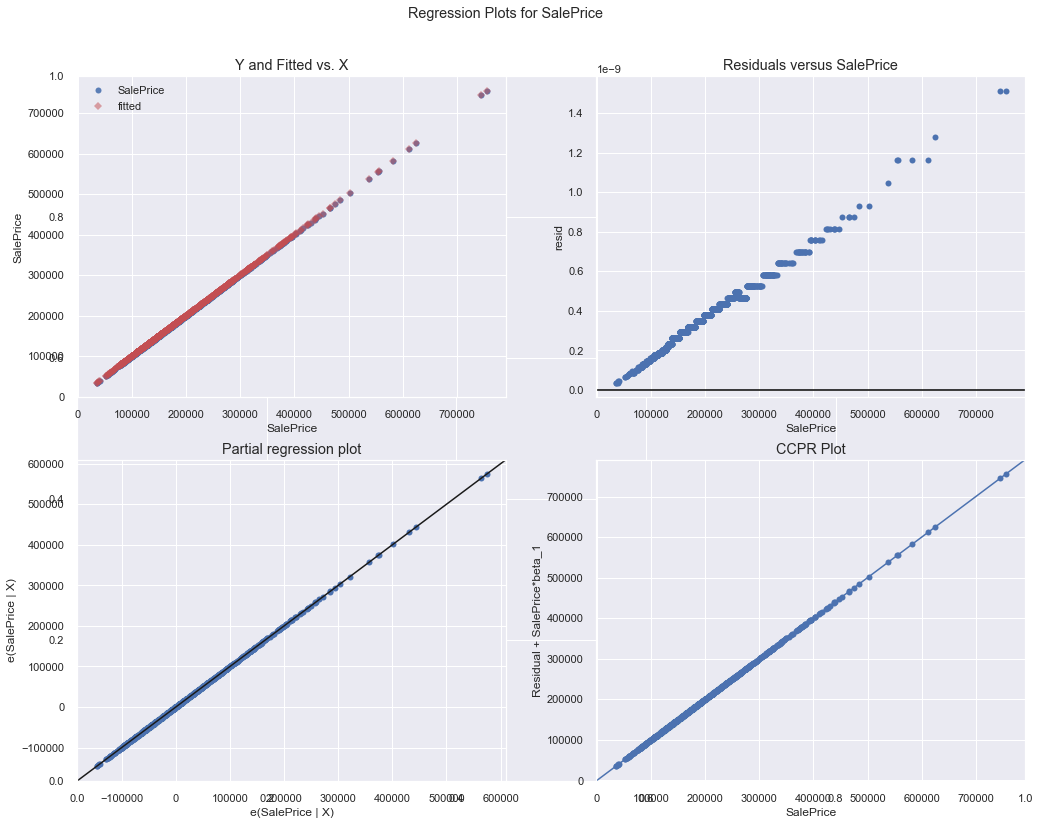

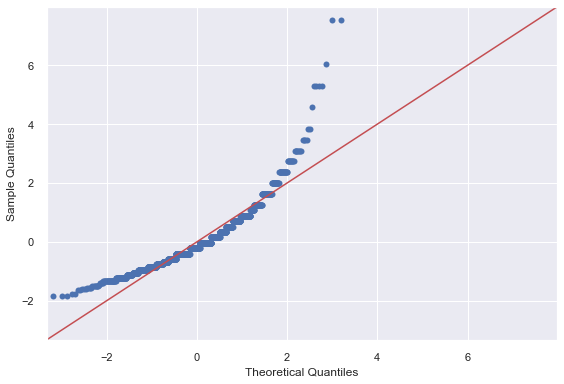

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~yr_diff
-------------------------------------------------------------------------------------


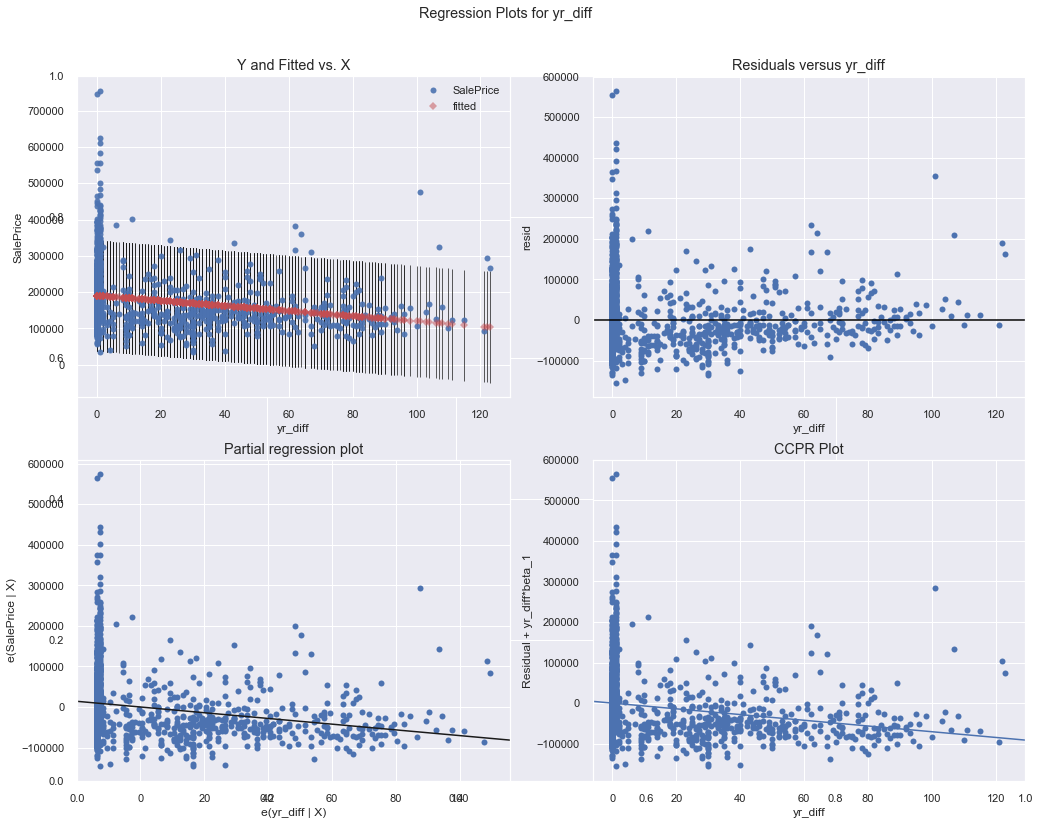

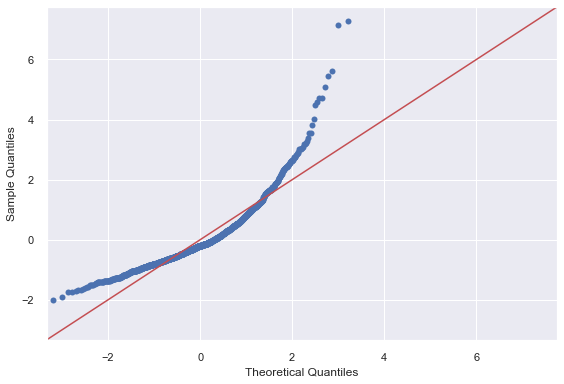

Press Enter to continue...


[['YrSold',
  0.0008365159328426186,
  3654560.365410496,
  -1730.0587285437991,
  0.2694131932807979,
  3432.7578051746077],
 ['MoSold',
  0.0021559533965250788,
  172295.88415409686,
  1364.350502168846,
  0.07612757850604784,
  3588.247230547607],
 ['Fireplaces',
  0.2180225385901352,
  145648.49075710934,
  57539.831837564474,
  6.141487461119551e-80,
  3092.9933480406135],
 ['TotRmsAbvGrd',
  0.284860406804438,
  10896.471957614627,
  26086.18084719237,
  2.7722809329549803e-108,
  2240.440265865938],
 ['GrLivArea',
  0.5021486502718042,
  18569.02585648725,
  107.13035896582522,
  4.518033646774736e-223,
  3432.2865649774126],
 ['FullBath',
  0.3143438548592459,
  54388.27732380509,
  80848.1667865403,
  1.23647006675802e-121,
  3515.0047608041714],
 ['YearRemodAdd',
  0.25715139084530336,
  -3692146.1698673484,
  1951.2994060556628,
  3.1649482419159197e-96,
  5931.4590637411575],
 ['YearBuilt',
  0.2734216207324913,
  -2530308.2457323587,
  1375.3734679368931,
  2.9902290990141

In [45]:
# Your code here
results = []
for idx, col in enumerate(df.columns):
    print (f"Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~{col}")
    print ("-------------------------------------------------------------------------------------")

    f = f'SalePrice~{col}'
    model = ols(formula=f, data=df).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")
    
results

Store following values in array for each iteration:
Independent Variable
'r_squared'
'intercept'
'slope'
'p-value'
'normality (JB)'

Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.